In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [24]:
from os import walk

prefix = "./experimental_data/SubgradientVIDescent/fun/"
filenames = next(walk(prefix), (None, None, []))[2]
filenames

['sub#first_order_subproblem_combined_p_param#2_exp#0_99a262c44de3c69df6e73ec31b04bccf.npz',
 'sub#first_order_subproblem_combined_p_param#2_exp#0_aa9f84e7052e0aeb96a838c15e210d55.npz',
 'sub#first_order_subproblem_combined_p_param#2_exp#0_bf4ce8b21e14d9ff13a310f53cb46704.npz',
 'sub#first_order_subproblem_combined_p_param#2_exp#0_ed1bfeff15769fb0b15fa324d9f4be9e.npz',
 'sub#first_order_subproblem_combined_p_param#4_exp#0_139283045ad38bcf9811128034c99062.npz']

In [25]:
prefix_second = "./experimental_data/SubgradientVIAdaptiveDescent/fun/"
filenames_second = next(walk(prefix_second), (None, None, []))[2]
filenames_second

['sub#first_order_adaptive_subproblem_combined_p_param#2_exp#0_08dc63d81fd5e3069d2bfd942907944b.npz',
 'sub#first_order_adaptive_subproblem_combined_p_param#2_exp#0_972a8d4e4e9650b6d82e1a1dd9b7637b.npz',
 'sub#first_order_adaptive_subproblem_combined_p_param#2_exp#0_f815d4f8ce7553caca737e508fda9463.npz']

In [26]:
res_original = np.load(prefix + filenames[2], allow_pickle=True)
res_adaptive = np.load(prefix_second + filenames_second[2], allow_pickle=True)

In [27]:
n_it = 35000
theoretical_orig = np.array(res_original["optional_parameters"].item()["theoretical_est"])
time_orig = np.array(res_original["optional_parameters"].item()["time"])
print(theoretical_orig.shape)
print(time_orig.shape)

theoretical_adapt = np.array(res_adaptive["optional_parameters"].item()["theoretical_est"])
time_adapt = np.array(res_adaptive["optional_parameters"].item()["time"])
print(theoretical_adapt.shape)
print(time_adapt.shape)

(350,)
(1,)
(350,)
(1,)


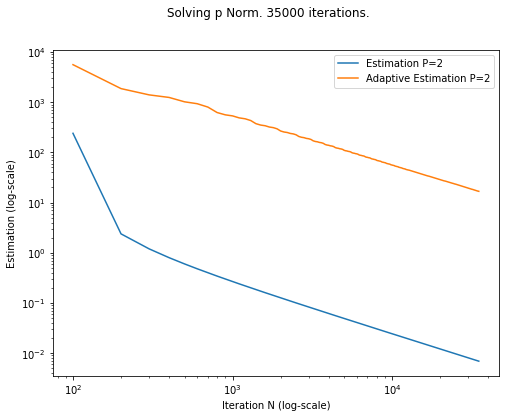

In [74]:
fig = plt.figure(figsize=(8, 6))
# print("f_vals shape: ", f_vals_2.shape)
fig.suptitle('Solving p Norm. {} iterations.'.format(n_it))

ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(f'Estimation (log-scale)')

#print("1 shapes: ", estimation_2.shape)
# print([estimation_2][0][0:10])
# f_discrepancy = np.array([f_vals_2 - f_solution_2][0])
# print("1 disc: ", f_discrepancy.shape)

ax.set_xlabel('Iteration N (log-scale)')
#ax.set_ylim([0, 3])
# ax.plot(np.arange(n_it), np.array([f_vals_2 - f_solution_2][0]), label="discrepancy P=2", color="g")

ax.plot(np.array(list(range(1, n_it//100))) * 100, theoretical_orig[:n_it//100 - 1],
        label="Estimation P=2")

ax.plot(np.array(list(range(1, n_it//100))) * 100, theoretical_calc[:n_it//100 - 1],
        label="Adaptive Estimation P=2")

ax.set_yscale("log")
ax.set_xscale("log")

ax.legend(loc="upper right")

plt.show()

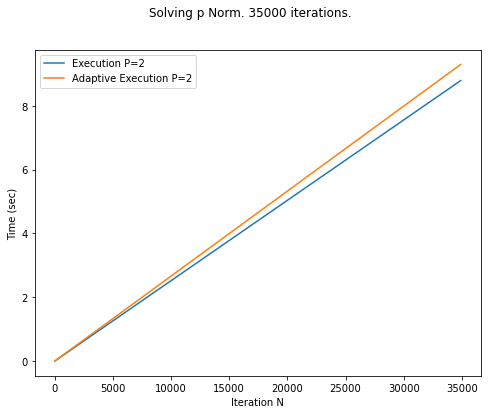

In [75]:
fig = plt.figure(figsize=(8, 6))
# print("f_vals shape: ", f_vals_2.shape)
fig.suptitle('Solving p Norm. {} iterations.'.format(n_it))

ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(f'Time (sec)')

#print("1 shapes: ", estimation_2.shape)
# print([estimation_2][0][0:10])
# f_discrepancy = np.array([f_vals_2 - f_solution_2][0])
# print("1 disc: ", f_discrepancy.shape)

ax.set_xlabel('Iteration N')
#ax.set_ylim([0, 3])
# ax.plot(np.arange(n_it), np.array([f_vals_2 - f_solution_2][0]), label="discrepancy P=2", color="g")

ax.plot(np.array(list(range(n_it//100))) * 100, np.array([time_calc(x, n_it, time_orig) for x in list(range(0, n_it, 100))]).reshape(n_it//100),
        label="Execution P=2")

ax.plot(np.array(list(range(n_it//100))) * 100, np.array([time_calc(x, n_it, time_adapt) for x in list(range(0, n_it, 100))]).reshape(n_it//100),
        label="Adaptive Execution P=2")

ax.legend(loc="upper left")

plt.show()

In [46]:
R = 74.83314773547883
l = np.array(res_adaptive["optional_parameters"].item()["l"])
delta = np.array(res_adaptive["optional_parameters"].item()["delta"])

def estimation_f(iter):
    rev = np.reciprocal(l[:iter])
    s = np.sum(rev)
    #print("rev shape: ", rev.shape, " rev[0]: ", rev[-1])
    #print("delta shape: ", delta[:iter].shape, " delta[0]: ", delta[:iter][-1])
    m = np.multiply(rev, delta[:iter])
    #print("mul shape: ", m.shape, " m[0]: ", m[-1])
    partial = np.sum(rev * delta[:iter])
    return (R ** 2 + partial) / s

estimation_f(10000)
theoretical_calc = [estimation_f(x) for x in list(range(1, n_it//100)) * 100]
print(theoretical_calc[:-10])

rev shape:  (10000,)  rev[0]:  0.5
delta shape:  (10000,)  delta[0]:  0.4
mul shape:  (10000,)  m[0]:  0.2
rev shape:  (1,)  rev[0]:  1.0
delta shape:  (1,)  delta[0]:  0.2
mul shape:  (1,)  m[0]:  0.2
rev shape:  (2,)  rev[0]:  2.0
delta shape:  (2,)  delta[0]:  0.1
mul shape:  (2,)  m[0]:  0.2
rev shape:  (3,)  rev[0]:  1.0
delta shape:  (3,)  delta[0]:  0.2
mul shape:  (3,)  m[0]:  0.2
rev shape:  (4,)  rev[0]:  0.5
delta shape:  (4,)  delta[0]:  0.4
mul shape:  (4,)  m[0]:  0.2
rev shape:  (5,)  rev[0]:  1.0
delta shape:  (5,)  delta[0]:  0.2
mul shape:  (5,)  m[0]:  0.2
rev shape:  (6,)  rev[0]:  0.5
delta shape:  (6,)  delta[0]:  0.4
mul shape:  (6,)  m[0]:  0.2
rev shape:  (7,)  rev[0]:  1.0
delta shape:  (7,)  delta[0]:  0.2
mul shape:  (7,)  m[0]:  0.2
rev shape:  (8,)  rev[0]:  2.0
delta shape:  (8,)  delta[0]:  0.1
mul shape:  (8,)  m[0]:  0.2
rev shape:  (9,)  rev[0]:  1.0
delta shape:  (9,)  delta[0]:  0.2
mul shape:  (9,)  m[0]:  0.2
rev shape:  (10,)  rev[0]:  0.5
delta 

rev shape:  (250,)  rev[0]:  0.5
delta shape:  (250,)  delta[0]:  0.4
mul shape:  (250,)  m[0]:  0.2
rev shape:  (251,)  rev[0]:  1.0
delta shape:  (251,)  delta[0]:  0.2
mul shape:  (251,)  m[0]:  0.2
rev shape:  (252,)  rev[0]:  2.0
delta shape:  (252,)  delta[0]:  0.1
mul shape:  (252,)  m[0]:  0.2
rev shape:  (253,)  rev[0]:  1.0
delta shape:  (253,)  delta[0]:  0.2
mul shape:  (253,)  m[0]:  0.2
rev shape:  (254,)  rev[0]:  0.5
delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m

delta shape:  (184,)  delta[0]:  0.4
mul shape:  (184,)  m[0]:  0.2
rev shape:  (185,)  rev[0]:  1.0
delta shape:  (185,)  delta[0]:  0.2
mul shape:  (185,)  m[0]:  0.2
rev shape:  (186,)  rev[0]:  2.0
delta shape:  (186,)  delta[0]:  0.1
mul shape:  (186,)  m[0]:  0.2
rev shape:  (187,)  rev[0]:  1.0
delta shape:  (187,)  delta[0]:  0.2
mul shape:  (187,)  m[0]:  0.2
rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta[0]:  0.4
mul shape:  (190,)  m[0]:  0.2
rev shape:  (191,)  rev[0]:  1.0
delta shape:  (191,)  delta[0]:  0.2
mul shape:  (191,)  m[0]:  0.2
rev shape:  (192,)  rev[0]:  2.0
delta shape:  (192,)  delta[0]:  0.1
mul shape:  (192,)  m[0]:  0.2
rev shape:  (193,)  rev[0]:  1.0
delta shape:  (193,)  delta[0]:  0.2
mul shape:  (193,)  m[0]:  0.2
rev shape:  (194,)  rev

delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  rev[0]:  1.0
delta shape:  (87,)  delta[0]:  0.2
mul shape:  (87,)  m[0]:  0.2
rev shape:  (88,)  rev[0]:  0.5
delta shape:  (88,)  delta[0]:  0.4
mul shape:  (88,)  m[0]:  0.2
rev shape:  (89,)  rev[0]:  1.0
delta shape:  (89,)  delta[0]:  0.2
mul shape:  (89,)  m[0]:  0.2
rev shape:  (90,)  rev[0]:  0.5
delta shape:  (90,)  delta[0]:  0.4
mul shape:  (90,)  m[0]:  0.2
rev shape:  (91,)  rev[0]:  1.0
delta shape:  (91,)  delta[0]:  0.2
mul shape:  (91,)  m[0]:  0.2
rev shape:  (92,)  rev[0]:  2.0
delta shape:  (92,)  delta[0]:  0.1
mul shape:  (92,)  m[0]:  0.2
rev shape:  (93,)  rev[0]:  1.0
delta shape:  (93,)  delta[0]:  0.2
mul shape:  (93,)  m[0]:  0.2
rev shape:  (94,)  rev[0]:  0.5
delta shape:  (94,)  delta[0]:  0.4
mul shape:  (94,)  m[0]:  0.2
rev shape:  (95,)  rev[0]:  1.0
delta shape:  (95,) 

mul shape:  (1,)  m[0]:  0.2
rev shape:  (2,)  rev[0]:  2.0
delta shape:  (2,)  delta[0]:  0.1
mul shape:  (2,)  m[0]:  0.2
rev shape:  (3,)  rev[0]:  1.0
delta shape:  (3,)  delta[0]:  0.2
mul shape:  (3,)  m[0]:  0.2
rev shape:  (4,)  rev[0]:  0.5
delta shape:  (4,)  delta[0]:  0.4
mul shape:  (4,)  m[0]:  0.2
rev shape:  (5,)  rev[0]:  1.0
delta shape:  (5,)  delta[0]:  0.2
mul shape:  (5,)  m[0]:  0.2
rev shape:  (6,)  rev[0]:  0.5
delta shape:  (6,)  delta[0]:  0.4
mul shape:  (6,)  m[0]:  0.2
rev shape:  (7,)  rev[0]:  1.0
delta shape:  (7,)  delta[0]:  0.2
mul shape:  (7,)  m[0]:  0.2
rev shape:  (8,)  rev[0]:  2.0
delta shape:  (8,)  delta[0]:  0.1
mul shape:  (8,)  m[0]:  0.2
rev shape:  (9,)  rev[0]:  1.0
delta shape:  (9,)  delta[0]:  0.2
mul shape:  (9,)  m[0]:  0.2
rev shape:  (10,)  rev[0]:  0.5
delta shape:  (10,)  delta[0]:  0.4
mul shape:  (10,)  m[0]:  0.2
rev shape:  (11,)  rev[0]:  1.0
delta shape:  (11,)  delta[0]:  0.2
mul shape:  (11,)  m[0]:  0.2
rev shape:  (12

mul shape:  (249,)  m[0]:  0.2
rev shape:  (250,)  rev[0]:  0.5
delta shape:  (250,)  delta[0]:  0.4
mul shape:  (250,)  m[0]:  0.2
rev shape:  (251,)  rev[0]:  1.0
delta shape:  (251,)  delta[0]:  0.2
mul shape:  (251,)  m[0]:  0.2
rev shape:  (252,)  rev[0]:  2.0
delta shape:  (252,)  delta[0]:  0.1
mul shape:  (252,)  m[0]:  0.2
rev shape:  (253,)  rev[0]:  1.0
delta shape:  (253,)  delta[0]:  0.2
mul shape:  (253,)  m[0]:  0.2
rev shape:  (254,)  rev[0]:  0.5
delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta

mul shape:  (178,)  m[0]:  0.2
rev shape:  (179,)  rev[0]:  1.0
delta shape:  (179,)  delta[0]:  0.2
mul shape:  (179,)  m[0]:  0.2
rev shape:  (180,)  rev[0]:  2.0
delta shape:  (180,)  delta[0]:  0.1
mul shape:  (180,)  m[0]:  0.2
rev shape:  (181,)  rev[0]:  1.0
delta shape:  (181,)  delta[0]:  0.2
mul shape:  (181,)  m[0]:  0.2
rev shape:  (182,)  rev[0]:  0.5
delta shape:  (182,)  delta[0]:  0.4
mul shape:  (182,)  m[0]:  0.2
rev shape:  (183,)  rev[0]:  1.0
delta shape:  (183,)  delta[0]:  0.2
mul shape:  (183,)  m[0]:  0.2
rev shape:  (184,)  rev[0]:  0.5
delta shape:  (184,)  delta[0]:  0.4
mul shape:  (184,)  m[0]:  0.2
rev shape:  (185,)  rev[0]:  1.0
delta shape:  (185,)  delta[0]:  0.2
mul shape:  (185,)  m[0]:  0.2
rev shape:  (186,)  rev[0]:  2.0
delta shape:  (186,)  delta[0]:  0.1
mul shape:  (186,)  m[0]:  0.2
rev shape:  (187,)  rev[0]:  1.0
delta shape:  (187,)  delta[0]:  0.2
mul shape:  (187,)  m[0]:  0.2
rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta

mul shape:  (79,)  m[0]:  0.2
rev shape:  (80,)  rev[0]:  2.0
delta shape:  (80,)  delta[0]:  0.1
mul shape:  (80,)  m[0]:  0.2
rev shape:  (81,)  rev[0]:  1.0
delta shape:  (81,)  delta[0]:  0.2
mul shape:  (81,)  m[0]:  0.2
rev shape:  (82,)  rev[0]:  0.5
delta shape:  (82,)  delta[0]:  0.4
mul shape:  (82,)  m[0]:  0.2
rev shape:  (83,)  rev[0]:  1.0
delta shape:  (83,)  delta[0]:  0.2
mul shape:  (83,)  m[0]:  0.2
rev shape:  (84,)  rev[0]:  0.5
delta shape:  (84,)  delta[0]:  0.4
mul shape:  (84,)  m[0]:  0.2
rev shape:  (85,)  rev[0]:  1.0
delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  rev[0]:  1.0
delta shape:  (87,)  delta[0]:  0.2
mul shape:  (87,)  m[0]:  0.2
rev shape:  (88,)  rev[0]:  0.5
delta shape:  (88,)  delta[0]:  0.4
mul shape:  (88,)  m[0]:  0.2
rev shape:  (89,)  rev[0]:  1.0
delta shape:  (89,)  delta[0]:  0.2
mul shape:  (89,)  m

delta shape:  (22,)  delta[0]:  0.4
mul shape:  (22,)  m[0]:  0.2
rev shape:  (23,)  rev[0]:  1.0
delta shape:  (23,)  delta[0]:  0.2
mul shape:  (23,)  m[0]:  0.2
rev shape:  (24,)  rev[0]:  0.5
delta shape:  (24,)  delta[0]:  0.4
mul shape:  (24,)  m[0]:  0.2
rev shape:  (25,)  rev[0]:  1.0
delta shape:  (25,)  delta[0]:  0.2
mul shape:  (25,)  m[0]:  0.2
rev shape:  (26,)  rev[0]:  2.0
delta shape:  (26,)  delta[0]:  0.1
mul shape:  (26,)  m[0]:  0.2
rev shape:  (27,)  rev[0]:  1.0
delta shape:  (27,)  delta[0]:  0.2
mul shape:  (27,)  m[0]:  0.2
rev shape:  (28,)  rev[0]:  0.5
delta shape:  (28,)  delta[0]:  0.4
mul shape:  (28,)  m[0]:  0.2
rev shape:  (29,)  rev[0]:  1.0
delta shape:  (29,)  delta[0]:  0.2
mul shape:  (29,)  m[0]:  0.2
rev shape:  (30,)  rev[0]:  0.5
delta shape:  (30,)  delta[0]:  0.4
mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,) 

mul shape:  (230,)  m[0]:  0.2
rev shape:  (231,)  rev[0]:  1.0
delta shape:  (231,)  delta[0]:  0.2
mul shape:  (231,)  m[0]:  0.2
rev shape:  (232,)  rev[0]:  0.5
delta shape:  (232,)  delta[0]:  0.4
mul shape:  (232,)  m[0]:  0.2
rev shape:  (233,)  rev[0]:  1.0
delta shape:  (233,)  delta[0]:  0.2
mul shape:  (233,)  m[0]:  0.2
rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev[0]:  0.5
delta shape:  (236,)  delta[0]:  0.4
mul shape:  (236,)  m[0]:  0.2
rev shape:  (237,)  rev[0]:  1.0
delta shape:  (237,)  delta[0]:  0.2
mul shape:  (237,)  m[0]:  0.2
rev shape:  (238,)  rev[0]:  0.5
delta shape:  (238,)  delta[0]:  0.4
mul shape:  (238,)  m[0]:  0.2
rev shape:  (239,)  rev[0]:  1.0
delta shape:  (239,)  delta[0]:  0.2
mul shape:  (239,)  m[0]:  0.2
rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta

mul shape:  (131,)  m[0]:  0.2
rev shape:  (132,)  rev[0]:  2.0
delta shape:  (132,)  delta[0]:  0.1
mul shape:  (132,)  m[0]:  0.2
rev shape:  (133,)  rev[0]:  1.0
delta shape:  (133,)  delta[0]:  0.2
mul shape:  (133,)  m[0]:  0.2
rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m[0]:  0.2
rev shape:  (135,)  rev[0]:  1.0
delta shape:  (135,)  delta[0]:  0.2
mul shape:  (135,)  m[0]:  0.2
rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta[0]:  0.4
mul shape:  (140,)  m[0]:  0.2
rev shape:  (141,)  rev[0]:  1.0
delta shape:  (141,)  delta

mul shape:  (32,)  m[0]:  0.2
rev shape:  (33,)  rev[0]:  1.0
delta shape:  (33,)  delta[0]:  0.2
mul shape:  (33,)  m[0]:  0.2
rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m[0]:  0.2
rev shape:  (41,)  rev[0]:  1.0
delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m

delta shape:  (282,)  delta[0]:  0.4
mul shape:  (282,)  m[0]:  0.2
rev shape:  (283,)  rev[0]:  1.0
delta shape:  (283,)  delta[0]:  0.2
mul shape:  (283,)  m[0]:  0.2
rev shape:  (284,)  rev[0]:  0.5
delta shape:  (284,)  delta[0]:  0.4
mul shape:  (284,)  m[0]:  0.2
rev shape:  (285,)  rev[0]:  1.0
delta shape:  (285,)  delta[0]:  0.2
mul shape:  (285,)  m[0]:  0.2
rev shape:  (286,)  rev[0]:  2.0
delta shape:  (286,)  delta[0]:  0.1
mul shape:  (286,)  m[0]:  0.2
rev shape:  (287,)  rev[0]:  1.0
delta shape:  (287,)  delta[0]:  0.2
mul shape:  (287,)  m[0]:  0.2
rev shape:  (288,)  rev[0]:  0.5
delta shape:  (288,)  delta[0]:  0.4
mul shape:  (288,)  m[0]:  0.2
rev shape:  (289,)  rev[0]:  1.0
delta shape:  (289,)  delta[0]:  0.2
mul shape:  (289,)  m[0]:  0.2
rev shape:  (290,)  rev[0]:  0.5
delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta[0]:  0.2
mul shape:  (291,)  m[0]:  0.2
rev shape:  (292,)  rev

mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta[0]:  0.4
mul shape:  (142,)  m[0]:  0.2
rev shape:  (143,)  rev[0]:  1.0
delta shape:  (143,)  delta[0]:  0.2
mul shape:  (143,)  m[0]:  0.2
rev shape:  (144,)  rev[0]:  2.0
delta shape:  (144,)  delta[0]:  0.1
mul shape:  (144,)  m[0]:  0.2
rev shape:  (145,)  rev[0]:  1.0
delta shape:  (145,)  delta[0]:  0.2
mul shape:  (145,)  m[0]:  0.2
rev shape:  (146,)  rev[0]:  0.5
delta shape:  (146,)  delta[0]:  0.4
mul shape:  (146,)  m[0]:  0.2
rev shape:  (147,)  rev[0]:  1.0
delta shape:  (147,)  delta[0]:  0.2
mul shape:  (147,)  m[0]:  0.2
rev shape:  (148,)  rev[0]:  0.5
delta shape:  (148,)  delta[0]:  0.4
mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta

mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  rev[0]:  2.0
delta shape:  (44,)  delta[0]:  0.1
mul shape:  (44,)  m[0]:  0.2
rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  rev[0]:  0.5
delta shape:  (48,)  delta[0]:  0.4
mul shape:  (48,)  m[0]:  0.2
rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m

delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta[0]:  0.2
mul shape:  (291,)  m[0]:  0.2
rev shape:  (292,)  rev[0]:  2.0
delta shape:  (292,)  delta[0]:  0.1
mul shape:  (292,)  m[0]:  0.2
rev shape:  (293,)  rev[0]:  1.0
delta shape:  (293,)  delta[0]:  0.2
mul shape:  (293,)  m[0]:  0.2
rev shape:  (294,)  rev[0]:  0.5
delta shape:  (294,)  delta[0]:  0.4
mul shape:  (294,)  m[0]:  0.2
rev shape:  (295,)  rev[0]:  1.0
delta shape:  (295,)  delta[0]:  0.2
mul shape:  (295,)  m[0]:  0.2
rev shape:  (296,)  rev[0]:  0.5
delta shape:  (296,)  delta[0]:  0.4
mul shape:  (296,)  m[0]:  0.2
rev shape:  (297,)  rev[0]:  1.0
delta shape:  (297,)  delta[0]:  0.2
mul shape:  (297,)  m[0]:  0.2
rev shape:  (298,)  rev[0]:  2.0
delta shape:  (298,)  delta[0]:  0.1
mul shape:  (298,)  m[0]:  0.2
rev shape:  (299,)  rev[0]:  1.0
delta shape:  (299,)  delta[0]:  0.2
mul shape:  (299,)  m[0]:  0.2
rev shape:  (300,)  rev

mul shape:  (132,)  m[0]:  0.2
rev shape:  (133,)  rev[0]:  1.0
delta shape:  (133,)  delta[0]:  0.2
mul shape:  (133,)  m[0]:  0.2
rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m[0]:  0.2
rev shape:  (135,)  rev[0]:  1.0
delta shape:  (135,)  delta[0]:  0.2
mul shape:  (135,)  m[0]:  0.2
rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta[0]:  0.4
mul shape:  (140,)  m[0]:  0.2
rev shape:  (141,)  rev[0]:  1.0
delta shape:  (141,)  delta[0]:  0.2
mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta

delta shape:  (11,)  delta[0]:  0.2
mul shape:  (11,)  m[0]:  0.2
rev shape:  (12,)  rev[0]:  0.5
delta shape:  (12,)  delta[0]:  0.4
mul shape:  (12,)  m[0]:  0.2
rev shape:  (13,)  rev[0]:  1.0
delta shape:  (13,)  delta[0]:  0.2
mul shape:  (13,)  m[0]:  0.2
rev shape:  (14,)  rev[0]:  2.0
delta shape:  (14,)  delta[0]:  0.1
mul shape:  (14,)  m[0]:  0.2
rev shape:  (15,)  rev[0]:  1.0
delta shape:  (15,)  delta[0]:  0.2
mul shape:  (15,)  m[0]:  0.2
rev shape:  (16,)  rev[0]:  0.5
delta shape:  (16,)  delta[0]:  0.4
mul shape:  (16,)  m[0]:  0.2
rev shape:  (17,)  rev[0]:  1.0
delta shape:  (17,)  delta[0]:  0.2
mul shape:  (17,)  m[0]:  0.2
rev shape:  (18,)  rev[0]:  0.5
delta shape:  (18,)  delta[0]:  0.4
mul shape:  (18,)  m[0]:  0.2
rev shape:  (19,)  rev[0]:  1.0
delta shape:  (19,)  delta[0]:  0.2
mul shape:  (19,)  m[0]:  0.2
rev shape:  (20,)  rev[0]:  2.0
delta shape:  (20,)  delta[0]:  0.1
mul shape:  (20,)  m[0]:  0.2
rev shape:  (21,)  rev[0]:  1.0
delta shape:  (21,) 

delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m[0]:  0.2
rev shape:  (264,)  rev[0]:  0.5
delta shape:  (264,)  delta[0]:  0.4
mul shape:  (264,)  m[0]:  0.2
rev shape:  (265,)  rev[0]:  1.0
delta shape:  (265,)  delta[0]:  0.2
mul shape:  (265,)  m[0]:  0.2
rev shape:  (266,)  rev[0]:  0.5
delta shape:  (266,)  delta[0]:  0.4
mul shape:  (266,)  m[0]:  0.2
rev shape:  (267,)  rev[0]:  1.0
delta shape:  (267,)  delta[0]:  0.2
mul shape:  (267,)  m[0]:  0.2
rev shape:  (268,)  rev[0]:  2.0
delta shape:  (268,)  delta[0]:  0.1
mul shape:  (268,)  m[0]:  0.2
rev shape:  (269,)  rev[0]:  1.0
delta shape:  (269,)  delta[0]:  0.2
mul shape:  (269,)  m[0]:  0.2
rev shape:  (270,)  rev[0]:  0.5
delta shape:  (270,)  delta[0]:  0.4
mul shape:  (270,)  m[0]:  0.2
rev shape:  (271,)  rev

rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta[0]:  0.4
mul shape:  (140,)  m[0]:  0.2
rev shape:  (141,)  rev[0]:  1.0
delta shape:  (141,)  delta[0]:  0.2
mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta[0]:  0.4
mul shape:  (142,)  m[0]:  0.2
rev shape:  (143,)  rev[0]:  1.0
delta shape:  (143,)  delta[0]:  0.2
mul shape:  (143,)  m[0]:  0.2
rev shape:  (144,)  rev[0]:  2.0
delta shape:  (144,)  delta[0]:  0.1
mul shape:  (144,)  m[0]:  0.2
rev shape:  (145,)  rev[0]:  1.0
delta shape:  (145,)  delta[0]:  0.2
mul shape:  (145,)  m

rev shape:  (63,)  rev[0]:  1.0
delta shape:  (63,)  delta[0]:  0.2
mul shape:  (63,)  m[0]:  0.2
rev shape:  (64,)  rev[0]:  0.5
delta shape:  (64,)  delta[0]:  0.4
mul shape:  (64,)  m[0]:  0.2
rev shape:  (65,)  rev[0]:  1.0
delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  rev[0]:  0.5
delta shape:  (66,)  delta[0]:  0.4
mul shape:  (66,)  m[0]:  0.2
rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  rev[0]:  1.0
delta shape:  (71,)  delta[0]:  0.2
mul shape:  (71,)  m[0]:  0.2
rev shape:  (72,)  rev[0]:  0.5
delta shape:  (72,)  delta[0]:  0.4
mul shape:  (72,)  m[0]:  0.2
rev shape:  (73,)  r

delta shape:  (271,)  delta[0]:  0.2
mul shape:  (271,)  m[0]:  0.2
rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m[0]:  0.2
rev shape:  (275,)  rev[0]:  1.0
delta shape:  (275,)  delta[0]:  0.2
mul shape:  (275,)  m[0]:  0.2
rev shape:  (276,)  rev[0]:  0.5
delta shape:  (276,)  delta[0]:  0.4
mul shape:  (276,)  m[0]:  0.2
rev shape:  (277,)  rev[0]:  1.0
delta shape:  (277,)  delta[0]:  0.2
mul shape:  (277,)  m[0]:  0.2
rev shape:  (278,)  rev[0]:  0.5
delta shape:  (278,)  delta[0]:  0.4
mul shape:  (278,)  m[0]:  0.2
rev shape:  (279,)  rev[0]:  1.0
delta shape:  (279,)  delta[0]:  0.2
mul shape:  (279,)  m[0]:  0.2
rev shape:  (280,)  rev[0]:  2.0
delta shape:  (280,)  delta[0]:  0.1
mul shape:  (280,)  m[0]:  0.2
rev shape:  (281,)  rev

rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m[0]:  0.2
rev shape:  (135,)  rev[0]:  1.0
delta shape:  (135,)  delta[0]:  0.2
mul shape:  (135,)  m[0]:  0.2
rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta[0]:  0.4
mul shape:  (140,)  m[0]:  0.2
rev shape:  (141,)  rev[0]:  1.0
delta shape:  (141,)  delta[0]:  0.2
mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta[0]:  0.4
mul shape:  (142,)  m[0]:  0.2
rev shape:  (143,)  rev[0]:  1.0
delta shape:  (143,)  delta[0]:  0.2
mul shape:  (143,)  m

mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta

rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta[0]:  0.4
mul shape:  (240,)  m[0]:  0.2
rev shape:  (241,)  rev[0]:  1.0
delta shape:  (241,)  delta[0]:  0.2
mul shape:  (241,)  m[0]:  0.2
rev shape:  (242,)  rev[0]:  0.5
delta shape:  (242,)  delta[0]:  0.4
mul shape:  (242,)  m[0]:  0.2
rev shape:  (243,)  rev[0]:  1.0
delta shape:  (243,)  delta[0]:  0.2
mul shape:  (243,)  m[0]:  0.2
rev shape:  (244,)  rev[0]:  2.0
delta shape:  (244,)  delta[0]:  0.1
mul shape:  (244,)  m[0]:  0.2
rev shape:  (245,)  rev[0]:  1.0
delta shape:  (245,)  delta[0]:  0.2
mul shape:  (245,)  m[0]:  0.2
rev shape:  (246,)  rev[0]:  0.5
delta shape:  (246,)  delta[0]:  0.4
mul shape:  (246,)  m[0]:  0.2
rev shape:  (247,)  rev[0]:  1.0
delta shape:  (247,)  delta[0]:  0.2
mul shape:  (247,)  m[0]:  0.2
rev shape:  (248,)  rev[0]:  0.5
delta shape:  (248,)  delta[0]:  0.4
mul shape:  (248,)  m[0]:  0.2
rev shape:  (249,)  rev[0]:  1.0
delta shape:  (249,)  delta[0]:  0.2
mul shape:  (249,)  m

rev shape:  (141,)  rev[0]:  1.0
delta shape:  (141,)  delta[0]:  0.2
mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta[0]:  0.4
mul shape:  (142,)  m[0]:  0.2
rev shape:  (143,)  rev[0]:  1.0
delta shape:  (143,)  delta[0]:  0.2
mul shape:  (143,)  m[0]:  0.2
rev shape:  (144,)  rev[0]:  2.0
delta shape:  (144,)  delta[0]:  0.1
mul shape:  (144,)  m[0]:  0.2
rev shape:  (145,)  rev[0]:  1.0
delta shape:  (145,)  delta[0]:  0.2
mul shape:  (145,)  m[0]:  0.2
rev shape:  (146,)  rev[0]:  0.5
delta shape:  (146,)  delta[0]:  0.4
mul shape:  (146,)  m[0]:  0.2
rev shape:  (147,)  rev[0]:  1.0
delta shape:  (147,)  delta[0]:  0.2
mul shape:  (147,)  m[0]:  0.2
rev shape:  (148,)  rev[0]:  0.5
delta shape:  (148,)  delta[0]:  0.4
mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m

rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  rev[0]:  1.0
delta shape:  (55,)  delta[0]:  0.2
mul shape:  (55,)  m[0]:  0.2
rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,)  delta[0]:  0.1
mul shape:  (56,)  m[0]:  0.2
rev shape:  (57,)  rev[0]:  1.0
delta shape:  (57,)  delta[0]:  0.2
mul shape:  (57,)  m[0]:  0.2
rev shape:  (58,)  rev[0]:  0.5
delta shape:  (58,)  delta[0]:  0.4
mul shape:  (58,)  m[0]:  0.2
rev shape:  (59,)  r

mul shape:  (313,)  m[0]:  0.2
rev shape:  (314,)  rev[0]:  0.5
delta shape:  (314,)  delta[0]:  0.4
mul shape:  (314,)  m[0]:  0.2
rev shape:  (315,)  rev[0]:  1.0
delta shape:  (315,)  delta[0]:  0.2
mul shape:  (315,)  m[0]:  0.2
rev shape:  (316,)  rev[0]:  0.5
delta shape:  (316,)  delta[0]:  0.4
mul shape:  (316,)  m[0]:  0.2
rev shape:  (317,)  rev[0]:  1.0
delta shape:  (317,)  delta[0]:  0.2
mul shape:  (317,)  m[0]:  0.2
rev shape:  (318,)  rev[0]:  0.5
delta shape:  (318,)  delta[0]:  0.4
mul shape:  (318,)  m[0]:  0.2
rev shape:  (319,)  rev[0]:  1.0
delta shape:  (319,)  delta[0]:  0.2
mul shape:  (319,)  m[0]:  0.2
rev shape:  (320,)  rev[0]:  0.5
delta shape:  (320,)  delta[0]:  0.4
mul shape:  (320,)  m[0]:  0.2
rev shape:  (321,)  rev[0]:  1.0
delta shape:  (321,)  delta[0]:  0.2
mul shape:  (321,)  m[0]:  0.2
rev shape:  (322,)  rev[0]:  2.0
delta shape:  (322,)  delta[0]:  0.1
mul shape:  (322,)  m[0]:  0.2
rev shape:  (323,)  rev[0]:  1.0
delta shape:  (323,)  delta

delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev[0]:  0.5
delta shape:  (236,)  delta[0]:  0.4
mul shape:  (236,)  m[0]:  0.2
rev shape:  (237,)  rev[0]:  1.0
delta shape:  (237,)  delta[0]:  0.2
mul shape:  (237,)  m[0]:  0.2
rev shape:  (238,)  rev[0]:  0.5
delta shape:  (238,)  delta[0]:  0.4
mul shape:  (238,)  m[0]:  0.2
rev shape:  (239,)  rev[0]:  1.0
delta shape:  (239,)  delta[0]:  0.2
mul shape:  (239,)  m[0]:  0.2
rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta[0]:  0.4
mul shape:  (240,)  m[0]:  0.2
rev shape:  (241,)  rev[0]:  1.0
delta shape:  (241,)  delta[0]:  0.2
mul shape:  (241,)  m[0]:  0.2
rev shape:  (242,)  rev[0]:  0.5
delta shape:  (242,)  delta[0]:  0.4
mul shape:  (242,)  m[0]:  0.2
rev shape:  (243,)  rev[0]:  1.0
delta shape:  (243,)  delta[0]:  0.2
mul shape:  (243,)  m[0]:  0.2
rev shape:  (244,)  rev

mul shape:  (121,)  m[0]:  0.2
rev shape:  (122,)  rev[0]:  2.0
delta shape:  (122,)  delta[0]:  0.1
mul shape:  (122,)  m[0]:  0.2
rev shape:  (123,)  rev[0]:  1.0
delta shape:  (123,)  delta[0]:  0.2
mul shape:  (123,)  m[0]:  0.2
rev shape:  (124,)  rev[0]:  0.5
delta shape:  (124,)  delta[0]:  0.4
mul shape:  (124,)  m[0]:  0.2
rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev[0]:  1.0
delta shape:  (127,)  delta[0]:  0.2
mul shape:  (127,)  m[0]:  0.2
rev shape:  (128,)  rev[0]:  0.5
delta shape:  (128,)  delta[0]:  0.4
mul shape:  (128,)  m[0]:  0.2
rev shape:  (129,)  rev[0]:  1.0
delta shape:  (129,)  delta[0]:  0.2
mul shape:  (129,)  m[0]:  0.2
rev shape:  (130,)  rev[0]:  0.5
delta shape:  (130,)  delta[0]:  0.4
mul shape:  (130,)  m[0]:  0.2
rev shape:  (131,)  rev[0]:  1.0
delta shape:  (131,)  delta

delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m[0]:  0.2
rev shape:  (41,)  rev[0]:  1.0
delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  rev[0]:  2.0
delta shape:  (44,)  delta[0]:  0.1
mul shape:  (44,)  m[0]:  0.2
rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,) 

rev shape:  (270,)  rev[0]:  0.5
delta shape:  (270,)  delta[0]:  0.4
mul shape:  (270,)  m[0]:  0.2
rev shape:  (271,)  rev[0]:  1.0
delta shape:  (271,)  delta[0]:  0.2
mul shape:  (271,)  m[0]:  0.2
rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m[0]:  0.2
rev shape:  (275,)  rev[0]:  1.0
delta shape:  (275,)  delta[0]:  0.2
mul shape:  (275,)  m[0]:  0.2
rev shape:  (276,)  rev[0]:  0.5
delta shape:  (276,)  delta[0]:  0.4
mul shape:  (276,)  m[0]:  0.2
rev shape:  (277,)  rev[0]:  1.0
delta shape:  (277,)  delta[0]:  0.2
mul shape:  (277,)  m[0]:  0.2
rev shape:  (278,)  rev[0]:  0.5
delta shape:  (278,)  delta[0]:  0.4
mul shape:  (278,)  m[0]:  0.2
rev shape:  (279,)  rev[0]:  1.0
delta shape:  (279,)  delta[0]:  0.2
mul shape:  (279,)  m

rev shape:  (144,)  rev[0]:  2.0
delta shape:  (144,)  delta[0]:  0.1
mul shape:  (144,)  m[0]:  0.2
rev shape:  (145,)  rev[0]:  1.0
delta shape:  (145,)  delta[0]:  0.2
mul shape:  (145,)  m[0]:  0.2
rev shape:  (146,)  rev[0]:  0.5
delta shape:  (146,)  delta[0]:  0.4
mul shape:  (146,)  m[0]:  0.2
rev shape:  (147,)  rev[0]:  1.0
delta shape:  (147,)  delta[0]:  0.2
mul shape:  (147,)  m[0]:  0.2
rev shape:  (148,)  rev[0]:  0.5
delta shape:  (148,)  delta[0]:  0.4
mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta[0]:  0.2
mul shape:  (151,)  m[0]:  0.2
rev shape:  (152,)  rev[0]:  0.5
delta shape:  (152,)  delta[0]:  0.4
mul shape:  (152,)  m[0]:  0.2
rev shape:  (153,)  rev[0]:  1.0
delta shape:  (153,)  delta[0]:  0.2
mul shape:  (153,)  m

rev shape:  (5,)  rev[0]:  1.0
delta shape:  (5,)  delta[0]:  0.2
mul shape:  (5,)  m[0]:  0.2
rev shape:  (6,)  rev[0]:  0.5
delta shape:  (6,)  delta[0]:  0.4
mul shape:  (6,)  m[0]:  0.2
rev shape:  (7,)  rev[0]:  1.0
delta shape:  (7,)  delta[0]:  0.2
mul shape:  (7,)  m[0]:  0.2
rev shape:  (8,)  rev[0]:  2.0
delta shape:  (8,)  delta[0]:  0.1
mul shape:  (8,)  m[0]:  0.2
rev shape:  (9,)  rev[0]:  1.0
delta shape:  (9,)  delta[0]:  0.2
mul shape:  (9,)  m[0]:  0.2
rev shape:  (10,)  rev[0]:  0.5
delta shape:  (10,)  delta[0]:  0.4
mul shape:  (10,)  m[0]:  0.2
rev shape:  (11,)  rev[0]:  1.0
delta shape:  (11,)  delta[0]:  0.2
mul shape:  (11,)  m[0]:  0.2
rev shape:  (12,)  rev[0]:  0.5
delta shape:  (12,)  delta[0]:  0.4
mul shape:  (12,)  m[0]:  0.2
rev shape:  (13,)  rev[0]:  1.0
delta shape:  (13,)  delta[0]:  0.2
mul shape:  (13,)  m[0]:  0.2
rev shape:  (14,)  rev[0]:  2.0
delta shape:  (14,)  delta[0]:  0.1
mul shape:  (14,)  m[0]:  0.2
rev shape:  (15,)  rev[0]:  1.0
del

delta shape:  (213,)  delta[0]:  0.2
mul shape:  (213,)  m[0]:  0.2
rev shape:  (214,)  rev[0]:  0.5
delta shape:  (214,)  delta[0]:  0.4
mul shape:  (214,)  m[0]:  0.2
rev shape:  (215,)  rev[0]:  1.0
delta shape:  (215,)  delta[0]:  0.2
mul shape:  (215,)  m[0]:  0.2
rev shape:  (216,)  rev[0]:  0.5
delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m[0]:  0.2
rev shape:  (217,)  rev[0]:  1.0
delta shape:  (217,)  delta[0]:  0.2
mul shape:  (217,)  m[0]:  0.2
rev shape:  (218,)  rev[0]:  2.0
delta shape:  (218,)  delta[0]:  0.1
mul shape:  (218,)  m[0]:  0.2
rev shape:  (219,)  rev[0]:  1.0
delta shape:  (219,)  delta[0]:  0.2
mul shape:  (219,)  m[0]:  0.2
rev shape:  (220,)  rev[0]:  0.5
delta shape:  (220,)  delta[0]:  0.4
mul shape:  (220,)  m[0]:  0.2
rev shape:  (221,)  rev[0]:  1.0
delta shape:  (221,)  delta[0]:  0.2
mul shape:  (221,)  m[0]:  0.2
rev shape:  (222,)  rev[0]:  0.5
delta shape:  (222,)  delta[0]:  0.4
mul shape:  (222,)  m[0]:  0.2
rev shape:  (223,)  rev

rev shape:  (91,)  rev[0]:  1.0
delta shape:  (91,)  delta[0]:  0.2
mul shape:  (91,)  m[0]:  0.2
rev shape:  (92,)  rev[0]:  2.0
delta shape:  (92,)  delta[0]:  0.1
mul shape:  (92,)  m[0]:  0.2
rev shape:  (93,)  rev[0]:  1.0
delta shape:  (93,)  delta[0]:  0.2
mul shape:  (93,)  m[0]:  0.2
rev shape:  (94,)  rev[0]:  0.5
delta shape:  (94,)  delta[0]:  0.4
mul shape:  (94,)  m[0]:  0.2
rev shape:  (95,)  rev[0]:  1.0
delta shape:  (95,)  delta[0]:  0.2
mul shape:  (95,)  m[0]:  0.2
rev shape:  (96,)  rev[0]:  0.5
delta shape:  (96,)  delta[0]:  0.4
mul shape:  (96,)  m[0]:  0.2
rev shape:  (97,)  rev[0]:  1.0
delta shape:  (97,)  delta[0]:  0.2
mul shape:  (97,)  m[0]:  0.2
rev shape:  (98,)  rev[0]:  2.0
delta shape:  (98,)  delta[0]:  0.1
mul shape:  (98,)  m[0]:  0.2
rev shape:  (99,)  rev[0]:  1.0
delta shape:  (99,)  delta[0]:  0.2
mul shape:  (99,)  m[0]:  0.2
rev shape:  (100,)  rev[0]:  0.5
delta shape:  (100,)  delta[0]:  0.4
mul shape:  (100,)  m[0]:  0.2
rev shape:  (101,

rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m[0]:  0.2
rev shape:  (41,)  rev[0]:  1.0
delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  rev[0]:  2.0
delta shape:  (44,)  delta[0]:  0.1
mul shape:  (44,)  m[0]:  0.2
rev shape:  (45,)  r

rev shape:  (265,)  rev[0]:  1.0
delta shape:  (265,)  delta[0]:  0.2
mul shape:  (265,)  m[0]:  0.2
rev shape:  (266,)  rev[0]:  0.5
delta shape:  (266,)  delta[0]:  0.4
mul shape:  (266,)  m[0]:  0.2
rev shape:  (267,)  rev[0]:  1.0
delta shape:  (267,)  delta[0]:  0.2
mul shape:  (267,)  m[0]:  0.2
rev shape:  (268,)  rev[0]:  2.0
delta shape:  (268,)  delta[0]:  0.1
mul shape:  (268,)  m[0]:  0.2
rev shape:  (269,)  rev[0]:  1.0
delta shape:  (269,)  delta[0]:  0.2
mul shape:  (269,)  m[0]:  0.2
rev shape:  (270,)  rev[0]:  0.5
delta shape:  (270,)  delta[0]:  0.4
mul shape:  (270,)  m[0]:  0.2
rev shape:  (271,)  rev[0]:  1.0
delta shape:  (271,)  delta[0]:  0.2
mul shape:  (271,)  m[0]:  0.2
rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m

rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta[0]:  0.4
mul shape:  (190,)  m[0]:  0.2
rev shape:  (191,)  rev[0]:  1.0
delta shape:  (191,)  delta[0]:  0.2
mul shape:  (191,)  m[0]:  0.2
rev shape:  (192,)  rev[0]:  2.0
delta shape:  (192,)  delta[0]:  0.1
mul shape:  (192,)  m[0]:  0.2
rev shape:  (193,)  rev[0]:  1.0
delta shape:  (193,)  delta[0]:  0.2
mul shape:  (193,)  m[0]:  0.2
rev shape:  (194,)  rev[0]:  0.5
delta shape:  (194,)  delta[0]:  0.4
mul shape:  (194,)  m[0]:  0.2
rev shape:  (195,)  rev[0]:  1.0
delta shape:  (195,)  delta[0]:  0.2
mul shape:  (195,)  m[0]:  0.2
rev shape:  (196,)  rev[0]:  0.5
delta shape:  (196,)  delta[0]:  0.4
mul shape:  (196,)  m[0]:  0.2
rev shape:  (197,)  rev[0]:  1.0
delta shape:  (197,)  delta[0]:  0.2
mul shape:  (197,)  m

rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  rev[0]:  1.0
delta shape:  (71,)  delta[0]:  0.2
mul shape:  (71,)  m[0]:  0.2
rev shape:  (72,)  rev[0]:  0.5
delta shape:  (72,)  delta[0]:  0.4
mul shape:  (72,)  m[0]:  0.2
rev shape:  (73,)  rev[0]:  1.0
delta shape:  (73,)  delta[0]:  0.2
mul shape:  (73,)  m[0]:  0.2
rev shape:  (74,)  rev[0]:  2.0
delta shape:  (74,)  delta[0]:  0.1
mul shape:  (74,)  m[0]:  0.2
rev shape:  (75,)  rev[0]:  1.0
delta shape:  (75,)  delta[0]:  0.2
mul shape:  (75,)  m[0]:  0.2
rev shape:  (76,)  rev[0]:  0.5
delta shape:  (76,)  delta[0]:  0.4
mul shape:  (76,)  m[0]:  0.2
rev shape:  (77,)  r

mul shape:  (322,)  m[0]:  0.2
rev shape:  (323,)  rev[0]:  1.0
delta shape:  (323,)  delta[0]:  0.2
mul shape:  (323,)  m[0]:  0.2
rev shape:  (324,)  rev[0]:  0.5
delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta

rev shape:  (227,)  rev[0]:  1.0
delta shape:  (227,)  delta[0]:  0.2
mul shape:  (227,)  m[0]:  0.2
rev shape:  (228,)  rev[0]:  0.5
delta shape:  (228,)  delta[0]:  0.4
mul shape:  (228,)  m[0]:  0.2
rev shape:  (229,)  rev[0]:  1.0
delta shape:  (229,)  delta[0]:  0.2
mul shape:  (229,)  m[0]:  0.2
rev shape:  (230,)  rev[0]:  2.0
delta shape:  (230,)  delta[0]:  0.1
mul shape:  (230,)  m[0]:  0.2
rev shape:  (231,)  rev[0]:  1.0
delta shape:  (231,)  delta[0]:  0.2
mul shape:  (231,)  m[0]:  0.2
rev shape:  (232,)  rev[0]:  0.5
delta shape:  (232,)  delta[0]:  0.4
mul shape:  (232,)  m[0]:  0.2
rev shape:  (233,)  rev[0]:  1.0
delta shape:  (233,)  delta[0]:  0.2
mul shape:  (233,)  m[0]:  0.2
rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev[0]:  0.5
delta shape:  (236,)  delta[0]:  0.4
mul shape:  (236,)  m

mul shape:  (160,)  m[0]:  0.2
rev shape:  (161,)  rev[0]:  1.0
delta shape:  (161,)  delta[0]:  0.2
mul shape:  (161,)  m[0]:  0.2
rev shape:  (162,)  rev[0]:  2.0
delta shape:  (162,)  delta[0]:  0.1
mul shape:  (162,)  m[0]:  0.2
rev shape:  (163,)  rev[0]:  1.0
delta shape:  (163,)  delta[0]:  0.2
mul shape:  (163,)  m[0]:  0.2
rev shape:  (164,)  rev[0]:  0.5
delta shape:  (164,)  delta[0]:  0.4
mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta[0]:  0.2
mul shape:  (169,)  m[0]:  0.2
rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta

mul shape:  (61,)  m[0]:  0.2
rev shape:  (62,)  rev[0]:  2.0
delta shape:  (62,)  delta[0]:  0.1
mul shape:  (62,)  m[0]:  0.2
rev shape:  (63,)  rev[0]:  1.0
delta shape:  (63,)  delta[0]:  0.2
mul shape:  (63,)  m[0]:  0.2
rev shape:  (64,)  rev[0]:  0.5
delta shape:  (64,)  delta[0]:  0.4
mul shape:  (64,)  m[0]:  0.2
rev shape:  (65,)  rev[0]:  1.0
delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  rev[0]:  0.5
delta shape:  (66,)  delta[0]:  0.4
mul shape:  (66,)  m[0]:  0.2
rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  rev[0]:  1.0
delta shape:  (71,)  delta[0]:  0.2
mul shape:  (71,)  m

rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m[0]:  0.2
rev shape:  (340,)  rev[0]:  2.0
delta shape:  (340,)  delta[0]:  0.1
mul shape:  (340,)  m[0]:  0.2
rev shape:  (341,)  rev[0]:  1.0
delta shape:  (341,)  delta[0]:  0.2
mul shape:  (341,)  m[0]:  0.2
rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m[0]:  0.2
rev shape:  (343,)  rev[0]:  1.0
delta shape:  (343,)  delta[0]:  0.2
mul shape:  (343,)  m[0]:  0.2
rev shape:  (344,)  rev[0]:  0.5
delta shape:  (344,)  delta[0]:  0.4
mul shape:  (344,)  m[0]:  0.2
rev shape:  (345,)  rev[0]:  1.0
delta shape:  (345,)  delta[0]:  0.2
mul shape:  (345,)  m[0]:  0.2
rev shape:  (346,)  rev[0]:  0.5
delta shape:  (346,)  delta[0]:  0.4
mul shape:  (346,)  m

rev shape:  (254,)  rev[0]:  0.5
delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m[0]:  0.2
rev shape:  (261,)  rev[0]:  1.0
delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m

rev shape:  (158,)  rev[0]:  0.5
delta shape:  (158,)  delta[0]:  0.4
mul shape:  (158,)  m[0]:  0.2
rev shape:  (159,)  rev[0]:  1.0
delta shape:  (159,)  delta[0]:  0.2
mul shape:  (159,)  m[0]:  0.2
rev shape:  (160,)  rev[0]:  0.5
delta shape:  (160,)  delta[0]:  0.4
mul shape:  (160,)  m[0]:  0.2
rev shape:  (161,)  rev[0]:  1.0
delta shape:  (161,)  delta[0]:  0.2
mul shape:  (161,)  m[0]:  0.2
rev shape:  (162,)  rev[0]:  2.0
delta shape:  (162,)  delta[0]:  0.1
mul shape:  (162,)  m[0]:  0.2
rev shape:  (163,)  rev[0]:  1.0
delta shape:  (163,)  delta[0]:  0.2
mul shape:  (163,)  m[0]:  0.2
rev shape:  (164,)  rev[0]:  0.5
delta shape:  (164,)  delta[0]:  0.4
mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m

rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,)  delta[0]:  0.1
mul shape:  (56,)  m[0]:  0.2
rev shape:  (57,)  rev[0]:  1.0
delta shape:  (57,)  delta[0]:  0.2
mul shape:  (57,)  m[0]:  0.2
rev shape:  (58,)  rev[0]:  0.5
delta shape:  (58,)  delta[0]:  0.4
mul shape:  (58,)  m[0]:  0.2
rev shape:  (59,)  rev[0]:  1.0
delta shape:  (59,)  delta[0]:  0.2
mul shape:  (59,)  m[0]:  0.2
rev shape:  (60,)  rev[0]:  0.5
delta shape:  (60,)  delta[0]:  0.4
mul shape:  (60,)  m[0]:  0.2
rev shape:  (61,)  rev[0]:  1.0
delta shape:  (61,)  delta[0]:  0.2
mul shape:  (61,)  m[0]:  0.2
rev shape:  (62,)  rev[0]:  2.0
delta shape:  (62,)  delta[0]:  0.1
mul shape:  (62,)  m[0]:  0.2
rev shape:  (63,)  rev[0]:  1.0
delta shape:  (63,)  delta[0]:  0.2
mul shape:  (63,)  m[0]:  0.2
rev shape:  (64,)  rev[0]:  0.5
delta shape:  (64,)  delta[0]:  0.4
mul shape:  (64,)  m[0]:  0.2
rev shape:  (65,)  rev[0]:  1.0
delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  r

rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta[0]:  0.2
mul shape:  (335,)  m[0]:  0.2
rev shape:  (336,)  rev[0]:  0.5
delta shape:  (336,)  delta[0]:  0.4
mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m[0]:  0.2
rev shape:  (340,)  rev[0]:  2.0
delta shape:  (340,)  delta[0]:  0.1
mul shape:  (340,)  m[0]:  0.2
rev shape:  (341,)  rev[0]:  1.0
delta shape:  (341,)  delta[0]:  0.2
mul shape:  (341,)  m[0]:  0.2
rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m

rev shape:  (207,)  rev[0]:  1.0
delta shape:  (207,)  delta[0]:  0.2
mul shape:  (207,)  m[0]:  0.2
rev shape:  (208,)  rev[0]:  0.5
delta shape:  (208,)  delta[0]:  0.4
mul shape:  (208,)  m[0]:  0.2
rev shape:  (209,)  rev[0]:  1.0
delta shape:  (209,)  delta[0]:  0.2
mul shape:  (209,)  m[0]:  0.2
rev shape:  (210,)  rev[0]:  0.5
delta shape:  (210,)  delta[0]:  0.4
mul shape:  (210,)  m[0]:  0.2
rev shape:  (211,)  rev[0]:  1.0
delta shape:  (211,)  delta[0]:  0.2
mul shape:  (211,)  m[0]:  0.2
rev shape:  (212,)  rev[0]:  0.5
delta shape:  (212,)  delta[0]:  0.4
mul shape:  (212,)  m[0]:  0.2
rev shape:  (213,)  rev[0]:  1.0
delta shape:  (213,)  delta[0]:  0.2
mul shape:  (213,)  m[0]:  0.2
rev shape:  (214,)  rev[0]:  0.5
delta shape:  (214,)  delta[0]:  0.4
mul shape:  (214,)  m[0]:  0.2
rev shape:  (215,)  rev[0]:  1.0
delta shape:  (215,)  delta[0]:  0.2
mul shape:  (215,)  m[0]:  0.2
rev shape:  (216,)  rev[0]:  0.5
delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m

mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta[0]:  0.2
mul shape:  (151,)  m[0]:  0.2
rev shape:  (152,)  rev[0]:  0.5
delta shape:  (152,)  delta[0]:  0.4
mul shape:  (152,)  m[0]:  0.2
rev shape:  (153,)  rev[0]:  1.0
delta shape:  (153,)  delta[0]:  0.2
mul shape:  (153,)  m[0]:  0.2
rev shape:  (154,)  rev[0]:  0.5
delta shape:  (154,)  delta[0]:  0.4
mul shape:  (154,)  m[0]:  0.2
rev shape:  (155,)  rev[0]:  1.0
delta shape:  (155,)  delta[0]:  0.2
mul shape:  (155,)  m[0]:  0.2
rev shape:  (156,)  rev[0]:  2.0
delta shape:  (156,)  delta[0]:  0.1
mul shape:  (156,)  m[0]:  0.2
rev shape:  (157,)  rev[0]:  1.0
delta shape:  (157,)  delta[0]:  0.2
mul shape:  (157,)  m[0]:  0.2
rev shape:  (158,)  rev[0]:  0.5
delta shape:  (158,)  delta[0]:  0.4
mul shape:  (158,)  m[0]:  0.2
rev shape:  (159,)  rev[0]:  1.0
delta shape:  (159,)  delta

mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  rev[0]:  1.0
delta shape:  (55,)  delta[0]:  0.2
mul shape:  (55,)  m[0]:  0.2
rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,)  delta[0]:  0.1
mul shape:  (56,)  m[0]:  0.2
rev shape:  (57,)  rev[0]:  1.0
delta shape:  (57,)  delta[0]:  0.2
mul shape:  (57,)  m[0]:  0.2
rev shape:  (58,)  rev[0]:  0.5
delta shape:  (58,)  delta[0]:  0.4
mul shape:  (58,)  m[0]:  0.2
rev shape:  (59,)  rev[0]:  1.0
delta shape:  (59,)  delta[0]:  0.2
mul shape:  (59,)  m[0]:  0.2
rev shape:  (60,)  rev[0]:  0.5
delta shape:  (60,)  delta[0]:  0.4
mul shape:  (60,)  m

rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m[0]:  0.2
rev shape:  (343,)  rev[0]:  1.0
delta shape:  (343,)  delta[0]:  0.2
mul shape:  (343,)  m[0]:  0.2
rev shape:  (344,)  rev[0]:  0.5
delta shape:  (344,)  delta[0]:  0.4
mul shape:  (344,)  m[0]:  0.2
rev shape:  (345,)  rev[0]:  1.0
delta shape:  (345,)  delta[0]:  0.2
mul shape:  (345,)  m[0]:  0.2
rev shape:  (346,)  rev[0]:  0.5
delta shape:  (346,)  delta[0]:  0.4
mul shape:  (346,)  m[0]:  0.2
rev shape:  (347,)  rev[0]:  1.0
delta shape:  (347,)  delta[0]:  0.2
mul shape:  (347,)  m[0]:  0.2
rev shape:  (348,)  rev[0]:  0.5
delta shape:  (348,)  delta[0]:  0.4
mul shape:  (348,)  m[0]:  0.2
rev shape:  (349,)  rev[0]:  1.0
delta shape:  (349,)  delta[0]:  0.2
mul shape:  (349,)  m[0]:  0.2
rev shape:  (1,)  rev[0]:  1.0
delta shape:  (1,)  delta[0]:  0.2
mul shape:  (1,)  m[0]:  0.2
rev shape:  (2,)  rev[0]:  2.0
delta shape:  (2,)  delta[0]:  0.1
mul shape:  (2,)  m[0]:  0.2
re

rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev[0]:  0.5
delta shape:  (236,)  delta[0]:  0.4
mul shape:  (236,)  m[0]:  0.2
rev shape:  (237,)  rev[0]:  1.0
delta shape:  (237,)  delta[0]:  0.2
mul shape:  (237,)  m[0]:  0.2
rev shape:  (238,)  rev[0]:  0.5
delta shape:  (238,)  delta[0]:  0.4
mul shape:  (238,)  m[0]:  0.2
rev shape:  (239,)  rev[0]:  1.0
delta shape:  (239,)  delta[0]:  0.2
mul shape:  (239,)  m[0]:  0.2
rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta[0]:  0.4
mul shape:  (240,)  m[0]:  0.2
rev shape:  (241,)  rev[0]:  1.0
delta shape:  (241,)  delta[0]:  0.2
mul shape:  (241,)  m[0]:  0.2
rev shape:  (242,)  rev[0]:  0.5
delta shape:  (242,)  delta[0]:  0.4
mul shape:  (242,)  m[0]:  0.2
rev shape:  (243,)  rev[0]:  1.0
delta shape:  (243,)  delta[0]:  0.2
mul shape:  (243,)  m

mul shape:  (180,)  m[0]:  0.2
rev shape:  (181,)  rev[0]:  1.0
delta shape:  (181,)  delta[0]:  0.2
mul shape:  (181,)  m[0]:  0.2
rev shape:  (182,)  rev[0]:  0.5
delta shape:  (182,)  delta[0]:  0.4
mul shape:  (182,)  m[0]:  0.2
rev shape:  (183,)  rev[0]:  1.0
delta shape:  (183,)  delta[0]:  0.2
mul shape:  (183,)  m[0]:  0.2
rev shape:  (184,)  rev[0]:  0.5
delta shape:  (184,)  delta[0]:  0.4
mul shape:  (184,)  m[0]:  0.2
rev shape:  (185,)  rev[0]:  1.0
delta shape:  (185,)  delta[0]:  0.2
mul shape:  (185,)  m[0]:  0.2
rev shape:  (186,)  rev[0]:  2.0
delta shape:  (186,)  delta[0]:  0.1
mul shape:  (186,)  m[0]:  0.2
rev shape:  (187,)  rev[0]:  1.0
delta shape:  (187,)  delta[0]:  0.2
mul shape:  (187,)  m[0]:  0.2
rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta

rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  rev[0]:  0.5
delta shape:  (48,)  delta[0]:  0.4
mul shape:  (48,)  m[0]:  0.2
rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  r

mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m[0]:  0.2
rev shape:  (340,)  rev[0]:  2.0
delta shape:  (340,)  delta[0]:  0.1
mul shape:  (340,)  m[0]:  0.2
rev shape:  (341,)  rev[0]:  1.0
delta shape:  (341,)  delta[0]:  0.2
mul shape:  (341,)  m[0]:  0.2
rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m[0]:  0.2
rev shape:  (343,)  rev[0]:  1.0
delta shape:  (343,)  delta[0]:  0.2
mul shape:  (343,)  m[0]:  0.2
rev shape:  (344,)  rev[0]:  0.5
delta shape:  (344,)  delta[0]:  0.4
mul shape:  (344,)  m[0]:  0.2
rev shape:  (345,)  rev[0]:  1.0
delta shape:  (345,)  delta[0]:  0.2
mul shape:  (345,)  m[0]:  0.2
rev shape:  (346,)  rev[0]:  0.5
delta shape:  (346,)  delta

rev shape:  (196,)  rev[0]:  0.5
delta shape:  (196,)  delta[0]:  0.4
mul shape:  (196,)  m[0]:  0.2
rev shape:  (197,)  rev[0]:  1.0
delta shape:  (197,)  delta[0]:  0.2
mul shape:  (197,)  m[0]:  0.2
rev shape:  (198,)  rev[0]:  2.0
delta shape:  (198,)  delta[0]:  0.1
mul shape:  (198,)  m[0]:  0.2
rev shape:  (199,)  rev[0]:  1.0
delta shape:  (199,)  delta[0]:  0.2
mul shape:  (199,)  m[0]:  0.2
rev shape:  (200,)  rev[0]:  0.5
delta shape:  (200,)  delta[0]:  0.4
mul shape:  (200,)  m[0]:  0.2
rev shape:  (201,)  rev[0]:  1.0
delta shape:  (201,)  delta[0]:  0.2
mul shape:  (201,)  m[0]:  0.2
rev shape:  (202,)  rev[0]:  0.5
delta shape:  (202,)  delta[0]:  0.4
mul shape:  (202,)  m[0]:  0.2
rev shape:  (203,)  rev[0]:  1.0
delta shape:  (203,)  delta[0]:  0.2
mul shape:  (203,)  m[0]:  0.2
rev shape:  (204,)  rev[0]:  2.0
delta shape:  (204,)  delta[0]:  0.1
mul shape:  (204,)  m[0]:  0.2
rev shape:  (205,)  rev[0]:  1.0
delta shape:  (205,)  delta[0]:  0.2
mul shape:  (205,)  m

delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  rev[0]:  1.0
delta shape:  (71,)  delta[0]:  0.2
mul shape:  (71,)  m[0]:  0.2
rev shape:  (72,)  rev[0]:  0.5
delta shape:  (72,)  delta[0]:  0.4
mul shape:  (72,)  m[0]:  0.2
rev shape:  (73,)  rev[0]:  1.0
delta shape:  (73,)  delta[0]:  0.2
mul shape:  (73,)  m[0]:  0.2
rev shape:  (74,)  rev[0]:  2.0
delta shape:  (74,)  delta[0]:  0.1
mul shape:  (74,)  m[0]:  0.2
rev shape:  (75,)  rev[0]:  1.0
delta shape:  (75,)  delta[0]:  0.2
mul shape:  (75,)  m[0]:  0.2
rev shape:  (76,)  rev[0]:  0.5
delta shape:  (76,)  delta[0]:  0.4
mul shape:  (76,)  m[0]:  0.2
rev shape:  (77,)  rev[0]:  1.0
delta shape:  (77,)  delta[0]:  0.2
mul shape:  (77,)  m[0]:  0.2
rev shape:  (78,)  rev[0]:  0.5
delta shape:  (78,) 

rev shape:  (283,)  rev[0]:  1.0
delta shape:  (283,)  delta[0]:  0.2
mul shape:  (283,)  m[0]:  0.2
rev shape:  (284,)  rev[0]:  0.5
delta shape:  (284,)  delta[0]:  0.4
mul shape:  (284,)  m[0]:  0.2
rev shape:  (285,)  rev[0]:  1.0
delta shape:  (285,)  delta[0]:  0.2
mul shape:  (285,)  m[0]:  0.2
rev shape:  (286,)  rev[0]:  2.0
delta shape:  (286,)  delta[0]:  0.1
mul shape:  (286,)  m[0]:  0.2
rev shape:  (287,)  rev[0]:  1.0
delta shape:  (287,)  delta[0]:  0.2
mul shape:  (287,)  m[0]:  0.2
rev shape:  (288,)  rev[0]:  0.5
delta shape:  (288,)  delta[0]:  0.4
mul shape:  (288,)  m[0]:  0.2
rev shape:  (289,)  rev[0]:  1.0
delta shape:  (289,)  delta[0]:  0.2
mul shape:  (289,)  m[0]:  0.2
rev shape:  (290,)  rev[0]:  0.5
delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta[0]:  0.2
mul shape:  (291,)  m[0]:  0.2
rev shape:  (292,)  rev[0]:  2.0
delta shape:  (292,)  delta[0]:  0.1
mul shape:  (292,)  m

delta shape:  (164,)  delta[0]:  0.4
mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta[0]:  0.2
mul shape:  (169,)  m[0]:  0.2
rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta[0]:  0.4
mul shape:  (170,)  m[0]:  0.2
rev shape:  (171,)  rev[0]:  1.0
delta shape:  (171,)  delta[0]:  0.2
mul shape:  (171,)  m[0]:  0.2
rev shape:  (172,)  rev[0]:  0.5
delta shape:  (172,)  delta[0]:  0.4
mul shape:  (172,)  m[0]:  0.2
rev shape:  (173,)  rev[0]:  1.0
delta shape:  (173,)  delta[0]:  0.2
mul shape:  (173,)  m[0]:  0.2
rev shape:  (174,)  rev

delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  rev[0]:  0.5
delta shape:  (66,)  delta[0]:  0.4
mul shape:  (66,)  m[0]:  0.2
rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  rev[0]:  1.0
delta shape:  (71,)  delta[0]:  0.2
mul shape:  (71,)  m[0]:  0.2
rev shape:  (72,)  rev[0]:  0.5
delta shape:  (72,)  delta[0]:  0.4
mul shape:  (72,)  m[0]:  0.2
rev shape:  (73,)  rev[0]:  1.0
delta shape:  (73,)  delta[0]:  0.2
mul shape:  (73,)  m[0]:  0.2
rev shape:  (74,)  rev[0]:  2.0
delta shape:  (74,)  delta[0]:  0.1
mul shape:  (74,)  m[0]:  0.2
rev shape:  (75,)  rev[0]:  1.0
delta shape:  (75,) 

delta shape:  (315,)  delta[0]:  0.2
mul shape:  (315,)  m[0]:  0.2
rev shape:  (316,)  rev[0]:  0.5
delta shape:  (316,)  delta[0]:  0.4
mul shape:  (316,)  m[0]:  0.2
rev shape:  (317,)  rev[0]:  1.0
delta shape:  (317,)  delta[0]:  0.2
mul shape:  (317,)  m[0]:  0.2
rev shape:  (318,)  rev[0]:  0.5
delta shape:  (318,)  delta[0]:  0.4
mul shape:  (318,)  m[0]:  0.2
rev shape:  (319,)  rev[0]:  1.0
delta shape:  (319,)  delta[0]:  0.2
mul shape:  (319,)  m[0]:  0.2
rev shape:  (320,)  rev[0]:  0.5
delta shape:  (320,)  delta[0]:  0.4
mul shape:  (320,)  m[0]:  0.2
rev shape:  (321,)  rev[0]:  1.0
delta shape:  (321,)  delta[0]:  0.2
mul shape:  (321,)  m[0]:  0.2
rev shape:  (322,)  rev[0]:  2.0
delta shape:  (322,)  delta[0]:  0.1
mul shape:  (322,)  m[0]:  0.2
rev shape:  (323,)  rev[0]:  1.0
delta shape:  (323,)  delta[0]:  0.2
mul shape:  (323,)  m[0]:  0.2
rev shape:  (324,)  rev[0]:  0.5
delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev

delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m[0]:  0.2
rev shape:  (217,)  rev[0]:  1.0
delta shape:  (217,)  delta[0]:  0.2
mul shape:  (217,)  m[0]:  0.2
rev shape:  (218,)  rev[0]:  2.0
delta shape:  (218,)  delta[0]:  0.1
mul shape:  (218,)  m[0]:  0.2
rev shape:  (219,)  rev[0]:  1.0
delta shape:  (219,)  delta[0]:  0.2
mul shape:  (219,)  m[0]:  0.2
rev shape:  (220,)  rev[0]:  0.5
delta shape:  (220,)  delta[0]:  0.4
mul shape:  (220,)  m[0]:  0.2
rev shape:  (221,)  rev[0]:  1.0
delta shape:  (221,)  delta[0]:  0.2
mul shape:  (221,)  m[0]:  0.2
rev shape:  (222,)  rev[0]:  0.5
delta shape:  (222,)  delta[0]:  0.4
mul shape:  (222,)  m[0]:  0.2
rev shape:  (223,)  rev[0]:  1.0
delta shape:  (223,)  delta[0]:  0.2
mul shape:  (223,)  m[0]:  0.2
rev shape:  (224,)  rev[0]:  2.0
delta shape:  (224,)  delta[0]:  0.1
mul shape:  (224,)  m[0]:  0.2
rev shape:  (225,)  rev[0]:  1.0
delta shape:  (225,)  delta[0]:  0.2
mul shape:  (225,)  m[0]:  0.2
rev shape:  (226,)  rev

delta shape:  (84,)  delta[0]:  0.4
mul shape:  (84,)  m[0]:  0.2
rev shape:  (85,)  rev[0]:  1.0
delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  rev[0]:  1.0
delta shape:  (87,)  delta[0]:  0.2
mul shape:  (87,)  m[0]:  0.2
rev shape:  (88,)  rev[0]:  0.5
delta shape:  (88,)  delta[0]:  0.4
mul shape:  (88,)  m[0]:  0.2
rev shape:  (89,)  rev[0]:  1.0
delta shape:  (89,)  delta[0]:  0.2
mul shape:  (89,)  m[0]:  0.2
rev shape:  (90,)  rev[0]:  0.5
delta shape:  (90,)  delta[0]:  0.4
mul shape:  (90,)  m[0]:  0.2
rev shape:  (91,)  rev[0]:  1.0
delta shape:  (91,)  delta[0]:  0.2
mul shape:  (91,)  m[0]:  0.2
rev shape:  (92,)  rev[0]:  2.0
delta shape:  (92,)  delta[0]:  0.1
mul shape:  (92,)  m[0]:  0.2
rev shape:  (93,)  rev[0]:  1.0
delta shape:  (93,)  delta[0]:  0.2
mul shape:  (93,)  m[0]:  0.2
rev shape:  (94,)  rev[0]:  0.5
delta shape:  (94,) 

mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta

mul shape:  (226,)  m[0]:  0.2
rev shape:  (227,)  rev[0]:  1.0
delta shape:  (227,)  delta[0]:  0.2
mul shape:  (227,)  m[0]:  0.2
rev shape:  (228,)  rev[0]:  0.5
delta shape:  (228,)  delta[0]:  0.4
mul shape:  (228,)  m[0]:  0.2
rev shape:  (229,)  rev[0]:  1.0
delta shape:  (229,)  delta[0]:  0.2
mul shape:  (229,)  m[0]:  0.2
rev shape:  (230,)  rev[0]:  2.0
delta shape:  (230,)  delta[0]:  0.1
mul shape:  (230,)  m[0]:  0.2
rev shape:  (231,)  rev[0]:  1.0
delta shape:  (231,)  delta[0]:  0.2
mul shape:  (231,)  m[0]:  0.2
rev shape:  (232,)  rev[0]:  0.5
delta shape:  (232,)  delta[0]:  0.4
mul shape:  (232,)  m[0]:  0.2
rev shape:  (233,)  rev[0]:  1.0
delta shape:  (233,)  delta[0]:  0.2
mul shape:  (233,)  m[0]:  0.2
rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev[0]:  0.5
delta shape:  (236,)  delta

rev shape:  (118,)  rev[0]:  0.5
delta shape:  (118,)  delta[0]:  0.4
mul shape:  (118,)  m[0]:  0.2
rev shape:  (119,)  rev[0]:  1.0
delta shape:  (119,)  delta[0]:  0.2
mul shape:  (119,)  m[0]:  0.2
rev shape:  (120,)  rev[0]:  0.5
delta shape:  (120,)  delta[0]:  0.4
mul shape:  (120,)  m[0]:  0.2
rev shape:  (121,)  rev[0]:  1.0
delta shape:  (121,)  delta[0]:  0.2
mul shape:  (121,)  m[0]:  0.2
rev shape:  (122,)  rev[0]:  2.0
delta shape:  (122,)  delta[0]:  0.1
mul shape:  (122,)  m[0]:  0.2
rev shape:  (123,)  rev[0]:  1.0
delta shape:  (123,)  delta[0]:  0.2
mul shape:  (123,)  m[0]:  0.2
rev shape:  (124,)  rev[0]:  0.5
delta shape:  (124,)  delta[0]:  0.4
mul shape:  (124,)  m[0]:  0.2
rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev[0]:  1.0
delta shape:  (127,)  delta[0]:  0.2
mul shape:  (127,)  m

rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  rev[0]:  0.5
delta shape:  (48,)  delta[0]:  0.4
mul shape:  (48,)  m[0]:  0.2
rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  r

mul shape:  (265,)  m[0]:  0.2
rev shape:  (266,)  rev[0]:  0.5
delta shape:  (266,)  delta[0]:  0.4
mul shape:  (266,)  m[0]:  0.2
rev shape:  (267,)  rev[0]:  1.0
delta shape:  (267,)  delta[0]:  0.2
mul shape:  (267,)  m[0]:  0.2
rev shape:  (268,)  rev[0]:  2.0
delta shape:  (268,)  delta[0]:  0.1
mul shape:  (268,)  m[0]:  0.2
rev shape:  (269,)  rev[0]:  1.0
delta shape:  (269,)  delta[0]:  0.2
mul shape:  (269,)  m[0]:  0.2
rev shape:  (270,)  rev[0]:  0.5
delta shape:  (270,)  delta[0]:  0.4
mul shape:  (270,)  m[0]:  0.2
rev shape:  (271,)  rev[0]:  1.0
delta shape:  (271,)  delta[0]:  0.2
mul shape:  (271,)  m[0]:  0.2
rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m[0]:  0.2
rev shape:  (275,)  rev[0]:  1.0
delta shape:  (275,)  delta

rev shape:  (210,)  rev[0]:  0.5
delta shape:  (210,)  delta[0]:  0.4
mul shape:  (210,)  m[0]:  0.2
rev shape:  (211,)  rev[0]:  1.0
delta shape:  (211,)  delta[0]:  0.2
mul shape:  (211,)  m[0]:  0.2
rev shape:  (212,)  rev[0]:  0.5
delta shape:  (212,)  delta[0]:  0.4
mul shape:  (212,)  m[0]:  0.2
rev shape:  (213,)  rev[0]:  1.0
delta shape:  (213,)  delta[0]:  0.2
mul shape:  (213,)  m[0]:  0.2
rev shape:  (214,)  rev[0]:  0.5
delta shape:  (214,)  delta[0]:  0.4
mul shape:  (214,)  m[0]:  0.2
rev shape:  (215,)  rev[0]:  1.0
delta shape:  (215,)  delta[0]:  0.2
mul shape:  (215,)  m[0]:  0.2
rev shape:  (216,)  rev[0]:  0.5
delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m[0]:  0.2
rev shape:  (217,)  rev[0]:  1.0
delta shape:  (217,)  delta[0]:  0.2
mul shape:  (217,)  m[0]:  0.2
rev shape:  (218,)  rev[0]:  2.0
delta shape:  (218,)  delta[0]:  0.1
mul shape:  (218,)  m[0]:  0.2
rev shape:  (219,)  rev[0]:  1.0
delta shape:  (219,)  delta[0]:  0.2
mul shape:  (219,)  m

delta shape:  (80,)  delta[0]:  0.1
mul shape:  (80,)  m[0]:  0.2
rev shape:  (81,)  rev[0]:  1.0
delta shape:  (81,)  delta[0]:  0.2
mul shape:  (81,)  m[0]:  0.2
rev shape:  (82,)  rev[0]:  0.5
delta shape:  (82,)  delta[0]:  0.4
mul shape:  (82,)  m[0]:  0.2
rev shape:  (83,)  rev[0]:  1.0
delta shape:  (83,)  delta[0]:  0.2
mul shape:  (83,)  m[0]:  0.2
rev shape:  (84,)  rev[0]:  0.5
delta shape:  (84,)  delta[0]:  0.4
mul shape:  (84,)  m[0]:  0.2
rev shape:  (85,)  rev[0]:  1.0
delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  rev[0]:  1.0
delta shape:  (87,)  delta[0]:  0.2
mul shape:  (87,)  m[0]:  0.2
rev shape:  (88,)  rev[0]:  0.5
delta shape:  (88,)  delta[0]:  0.4
mul shape:  (88,)  m[0]:  0.2
rev shape:  (89,)  rev[0]:  1.0
delta shape:  (89,)  delta[0]:  0.2
mul shape:  (89,)  m[0]:  0.2
rev shape:  (90,)  rev[0]:  0.5
delta shape:  (90,) 

delta shape:  (347,)  delta[0]:  0.2
mul shape:  (347,)  m[0]:  0.2
rev shape:  (348,)  rev[0]:  0.5
delta shape:  (348,)  delta[0]:  0.4
mul shape:  (348,)  m[0]:  0.2
rev shape:  (349,)  rev[0]:  1.0
delta shape:  (349,)  delta[0]:  0.2
mul shape:  (349,)  m[0]:  0.2
rev shape:  (1,)  rev[0]:  1.0
delta shape:  (1,)  delta[0]:  0.2
mul shape:  (1,)  m[0]:  0.2
rev shape:  (2,)  rev[0]:  2.0
delta shape:  (2,)  delta[0]:  0.1
mul shape:  (2,)  m[0]:  0.2
rev shape:  (3,)  rev[0]:  1.0
delta shape:  (3,)  delta[0]:  0.2
mul shape:  (3,)  m[0]:  0.2
rev shape:  (4,)  rev[0]:  0.5
delta shape:  (4,)  delta[0]:  0.4
mul shape:  (4,)  m[0]:  0.2
rev shape:  (5,)  rev[0]:  1.0
delta shape:  (5,)  delta[0]:  0.2
mul shape:  (5,)  m[0]:  0.2
rev shape:  (6,)  rev[0]:  0.5
delta shape:  (6,)  delta[0]:  0.4
mul shape:  (6,)  m[0]:  0.2
rev shape:  (7,)  rev[0]:  1.0
delta shape:  (7,)  delta[0]:  0.2
mul shape:  (7,)  m[0]:  0.2
rev shape:  (8,)  rev[0]:  2.0
delta shape:  (8,)  delta[0]:  0.1

rev shape:  (251,)  rev[0]:  1.0
delta shape:  (251,)  delta[0]:  0.2
mul shape:  (251,)  m[0]:  0.2
rev shape:  (252,)  rev[0]:  2.0
delta shape:  (252,)  delta[0]:  0.1
mul shape:  (252,)  m[0]:  0.2
rev shape:  (253,)  rev[0]:  1.0
delta shape:  (253,)  delta[0]:  0.2
mul shape:  (253,)  m[0]:  0.2
rev shape:  (254,)  rev[0]:  0.5
delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m

rev shape:  (174,)  rev[0]:  2.0
delta shape:  (174,)  delta[0]:  0.1
mul shape:  (174,)  m[0]:  0.2
rev shape:  (175,)  rev[0]:  1.0
delta shape:  (175,)  delta[0]:  0.2
mul shape:  (175,)  m[0]:  0.2
rev shape:  (176,)  rev[0]:  0.5
delta shape:  (176,)  delta[0]:  0.4
mul shape:  (176,)  m[0]:  0.2
rev shape:  (177,)  rev[0]:  1.0
delta shape:  (177,)  delta[0]:  0.2
mul shape:  (177,)  m[0]:  0.2
rev shape:  (178,)  rev[0]:  0.5
delta shape:  (178,)  delta[0]:  0.4
mul shape:  (178,)  m[0]:  0.2
rev shape:  (179,)  rev[0]:  1.0
delta shape:  (179,)  delta[0]:  0.2
mul shape:  (179,)  m[0]:  0.2
rev shape:  (180,)  rev[0]:  2.0
delta shape:  (180,)  delta[0]:  0.1
mul shape:  (180,)  m[0]:  0.2
rev shape:  (181,)  rev[0]:  1.0
delta shape:  (181,)  delta[0]:  0.2
mul shape:  (181,)  m[0]:  0.2
rev shape:  (182,)  rev[0]:  0.5
delta shape:  (182,)  delta[0]:  0.4
mul shape:  (182,)  m[0]:  0.2
rev shape:  (183,)  rev[0]:  1.0
delta shape:  (183,)  delta[0]:  0.2
mul shape:  (183,)  m

mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  rev[0]:  1.0
delta shape:  (55,)  delta[0]:  0.2
mul shape:  (55,)  m[0]:  0.2
rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,)  delta[0]:  0.1
mul shape:  (56,)  m[0]:  0.2
rev shape:  (57,)  rev[0]:  1.0
delta shape:  (57,)  delta[0]:  0.2
mul shape:  (57,)  m[0]:  0.2
rev shape:  (58,)  rev[0]:  0.5
delta shape:  (58,)  delta[0]:  0.4
mul shape:  (58,)  m[0]:  0.2
rev shape:  (59,)  rev[0]:  1.0
delta shape:  (59,)  delta[0]:  0.2
mul shape:  (59,)  m[0]:  0.2
rev shape:  (60,)  rev[0]:  0.5
delta shape:  (60,)  delta[0]:  0.4
mul shape:  (60,)  m[0]:  0.2
rev shape:  (61,)  rev[0]:  1.0
delta shape:  (61,)  delta[0]:  0.2
mul shape:  (61,)  m

delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev

rev shape:  (219,)  rev[0]:  1.0
delta shape:  (219,)  delta[0]:  0.2
mul shape:  (219,)  m[0]:  0.2
rev shape:  (220,)  rev[0]:  0.5
delta shape:  (220,)  delta[0]:  0.4
mul shape:  (220,)  m[0]:  0.2
rev shape:  (221,)  rev[0]:  1.0
delta shape:  (221,)  delta[0]:  0.2
mul shape:  (221,)  m[0]:  0.2
rev shape:  (222,)  rev[0]:  0.5
delta shape:  (222,)  delta[0]:  0.4
mul shape:  (222,)  m[0]:  0.2
rev shape:  (223,)  rev[0]:  1.0
delta shape:  (223,)  delta[0]:  0.2
mul shape:  (223,)  m[0]:  0.2
rev shape:  (224,)  rev[0]:  2.0
delta shape:  (224,)  delta[0]:  0.1
mul shape:  (224,)  m[0]:  0.2
rev shape:  (225,)  rev[0]:  1.0
delta shape:  (225,)  delta[0]:  0.2
mul shape:  (225,)  m[0]:  0.2
rev shape:  (226,)  rev[0]:  0.5
delta shape:  (226,)  delta[0]:  0.4
mul shape:  (226,)  m[0]:  0.2
rev shape:  (227,)  rev[0]:  1.0
delta shape:  (227,)  delta[0]:  0.2
mul shape:  (227,)  m[0]:  0.2
rev shape:  (228,)  rev[0]:  0.5
delta shape:  (228,)  delta[0]:  0.4
mul shape:  (228,)  m

mul shape:  (141,)  m[0]:  0.2
rev shape:  (142,)  rev[0]:  0.5
delta shape:  (142,)  delta[0]:  0.4
mul shape:  (142,)  m[0]:  0.2
rev shape:  (143,)  rev[0]:  1.0
delta shape:  (143,)  delta[0]:  0.2
mul shape:  (143,)  m[0]:  0.2
rev shape:  (144,)  rev[0]:  2.0
delta shape:  (144,)  delta[0]:  0.1
mul shape:  (144,)  m[0]:  0.2
rev shape:  (145,)  rev[0]:  1.0
delta shape:  (145,)  delta[0]:  0.2
mul shape:  (145,)  m[0]:  0.2
rev shape:  (146,)  rev[0]:  0.5
delta shape:  (146,)  delta[0]:  0.4
mul shape:  (146,)  m[0]:  0.2
rev shape:  (147,)  rev[0]:  1.0
delta shape:  (147,)  delta[0]:  0.2
mul shape:  (147,)  m[0]:  0.2
rev shape:  (148,)  rev[0]:  0.5
delta shape:  (148,)  delta[0]:  0.4
mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta

mul shape:  (27,)  m[0]:  0.2
rev shape:  (28,)  rev[0]:  0.5
delta shape:  (28,)  delta[0]:  0.4
mul shape:  (28,)  m[0]:  0.2
rev shape:  (29,)  rev[0]:  1.0
delta shape:  (29,)  delta[0]:  0.2
mul shape:  (29,)  m[0]:  0.2
rev shape:  (30,)  rev[0]:  0.5
delta shape:  (30,)  delta[0]:  0.4
mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,)  delta[0]:  0.1
mul shape:  (32,)  m[0]:  0.2
rev shape:  (33,)  rev[0]:  1.0
delta shape:  (33,)  delta[0]:  0.2
mul shape:  (33,)  m[0]:  0.2
rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m

mul shape:  (299,)  m[0]:  0.2
rev shape:  (300,)  rev[0]:  0.5
delta shape:  (300,)  delta[0]:  0.4
mul shape:  (300,)  m[0]:  0.2
rev shape:  (301,)  rev[0]:  1.0
delta shape:  (301,)  delta[0]:  0.2
mul shape:  (301,)  m[0]:  0.2
rev shape:  (302,)  rev[0]:  0.5
delta shape:  (302,)  delta[0]:  0.4
mul shape:  (302,)  m[0]:  0.2
rev shape:  (303,)  rev[0]:  1.0
delta shape:  (303,)  delta[0]:  0.2
mul shape:  (303,)  m[0]:  0.2
rev shape:  (304,)  rev[0]:  2.0
delta shape:  (304,)  delta[0]:  0.1
mul shape:  (304,)  m[0]:  0.2
rev shape:  (305,)  rev[0]:  1.0
delta shape:  (305,)  delta[0]:  0.2
mul shape:  (305,)  m[0]:  0.2
rev shape:  (306,)  rev[0]:  0.5
delta shape:  (306,)  delta[0]:  0.4
mul shape:  (306,)  m[0]:  0.2
rev shape:  (307,)  rev[0]:  1.0
delta shape:  (307,)  delta[0]:  0.2
mul shape:  (307,)  m[0]:  0.2
rev shape:  (308,)  rev[0]:  0.5
delta shape:  (308,)  delta[0]:  0.4
mul shape:  (308,)  m[0]:  0.2
rev shape:  (309,)  rev[0]:  1.0
delta shape:  (309,)  delta

delta shape:  (201,)  delta[0]:  0.2
mul shape:  (201,)  m[0]:  0.2
rev shape:  (202,)  rev[0]:  0.5
delta shape:  (202,)  delta[0]:  0.4
mul shape:  (202,)  m[0]:  0.2
rev shape:  (203,)  rev[0]:  1.0
delta shape:  (203,)  delta[0]:  0.2
mul shape:  (203,)  m[0]:  0.2
rev shape:  (204,)  rev[0]:  2.0
delta shape:  (204,)  delta[0]:  0.1
mul shape:  (204,)  m[0]:  0.2
rev shape:  (205,)  rev[0]:  1.0
delta shape:  (205,)  delta[0]:  0.2
mul shape:  (205,)  m[0]:  0.2
rev shape:  (206,)  rev[0]:  0.5
delta shape:  (206,)  delta[0]:  0.4
mul shape:  (206,)  m[0]:  0.2
rev shape:  (207,)  rev[0]:  1.0
delta shape:  (207,)  delta[0]:  0.2
mul shape:  (207,)  m[0]:  0.2
rev shape:  (208,)  rev[0]:  0.5
delta shape:  (208,)  delta[0]:  0.4
mul shape:  (208,)  m[0]:  0.2
rev shape:  (209,)  rev[0]:  1.0
delta shape:  (209,)  delta[0]:  0.2
mul shape:  (209,)  m[0]:  0.2
rev shape:  (210,)  rev[0]:  0.5
delta shape:  (210,)  delta[0]:  0.4
mul shape:  (210,)  m[0]:  0.2
rev shape:  (211,)  rev

delta shape:  (121,)  delta[0]:  0.2
mul shape:  (121,)  m[0]:  0.2
rev shape:  (122,)  rev[0]:  2.0
delta shape:  (122,)  delta[0]:  0.1
mul shape:  (122,)  m[0]:  0.2
rev shape:  (123,)  rev[0]:  1.0
delta shape:  (123,)  delta[0]:  0.2
mul shape:  (123,)  m[0]:  0.2
rev shape:  (124,)  rev[0]:  0.5
delta shape:  (124,)  delta[0]:  0.4
mul shape:  (124,)  m[0]:  0.2
rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev[0]:  1.0
delta shape:  (127,)  delta[0]:  0.2
mul shape:  (127,)  m[0]:  0.2
rev shape:  (128,)  rev[0]:  0.5
delta shape:  (128,)  delta[0]:  0.4
mul shape:  (128,)  m[0]:  0.2
rev shape:  (129,)  rev[0]:  1.0
delta shape:  (129,)  delta[0]:  0.2
mul shape:  (129,)  m[0]:  0.2
rev shape:  (130,)  rev[0]:  0.5
delta shape:  (130,)  delta[0]:  0.4
mul shape:  (130,)  m[0]:  0.2
rev shape:  (131,)  rev

delta shape:  (22,)  delta[0]:  0.4
mul shape:  (22,)  m[0]:  0.2
rev shape:  (23,)  rev[0]:  1.0
delta shape:  (23,)  delta[0]:  0.2
mul shape:  (23,)  m[0]:  0.2
rev shape:  (24,)  rev[0]:  0.5
delta shape:  (24,)  delta[0]:  0.4
mul shape:  (24,)  m[0]:  0.2
rev shape:  (25,)  rev[0]:  1.0
delta shape:  (25,)  delta[0]:  0.2
mul shape:  (25,)  m[0]:  0.2
rev shape:  (26,)  rev[0]:  2.0
delta shape:  (26,)  delta[0]:  0.1
mul shape:  (26,)  m[0]:  0.2
rev shape:  (27,)  rev[0]:  1.0
delta shape:  (27,)  delta[0]:  0.2
mul shape:  (27,)  m[0]:  0.2
rev shape:  (28,)  rev[0]:  0.5
delta shape:  (28,)  delta[0]:  0.4
mul shape:  (28,)  m[0]:  0.2
rev shape:  (29,)  rev[0]:  1.0
delta shape:  (29,)  delta[0]:  0.2
mul shape:  (29,)  m[0]:  0.2
rev shape:  (30,)  rev[0]:  0.5
delta shape:  (30,)  delta[0]:  0.4
mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,) 

rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m[0]:  0.2
rev shape:  (275,)  rev[0]:  1.0
delta shape:  (275,)  delta[0]:  0.2
mul shape:  (275,)  m[0]:  0.2
rev shape:  (276,)  rev[0]:  0.5
delta shape:  (276,)  delta[0]:  0.4
mul shape:  (276,)  m[0]:  0.2
rev shape:  (277,)  rev[0]:  1.0
delta shape:  (277,)  delta[0]:  0.2
mul shape:  (277,)  m[0]:  0.2
rev shape:  (278,)  rev[0]:  0.5
delta shape:  (278,)  delta[0]:  0.4
mul shape:  (278,)  m[0]:  0.2
rev shape:  (279,)  rev[0]:  1.0
delta shape:  (279,)  delta[0]:  0.2
mul shape:  (279,)  m[0]:  0.2
rev shape:  (280,)  rev[0]:  2.0
delta shape:  (280,)  delta[0]:  0.1
mul shape:  (280,)  m[0]:  0.2
rev shape:  (281,)  rev[0]:  1.0
delta shape:  (281,)  delta[0]:  0.2
mul shape:  (281,)  m

mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta[0]:  0.2
mul shape:  (169,)  m[0]:  0.2
rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta[0]:  0.4
mul shape:  (170,)  m[0]:  0.2
rev shape:  (171,)  rev[0]:  1.0
delta shape:  (171,)  delta[0]:  0.2
mul shape:  (171,)  m[0]:  0.2
rev shape:  (172,)  rev[0]:  0.5
delta shape:  (172,)  delta[0]:  0.4
mul shape:  (172,)  m[0]:  0.2
rev shape:  (173,)  rev[0]:  1.0
delta shape:  (173,)  delta[0]:  0.2
mul shape:  (173,)  m[0]:  0.2
rev shape:  (174,)  rev[0]:  2.0
delta shape:  (174,)  delta

rev shape:  (74,)  rev[0]:  2.0
delta shape:  (74,)  delta[0]:  0.1
mul shape:  (74,)  m[0]:  0.2
rev shape:  (75,)  rev[0]:  1.0
delta shape:  (75,)  delta[0]:  0.2
mul shape:  (75,)  m[0]:  0.2
rev shape:  (76,)  rev[0]:  0.5
delta shape:  (76,)  delta[0]:  0.4
mul shape:  (76,)  m[0]:  0.2
rev shape:  (77,)  rev[0]:  1.0
delta shape:  (77,)  delta[0]:  0.2
mul shape:  (77,)  m[0]:  0.2
rev shape:  (78,)  rev[0]:  0.5
delta shape:  (78,)  delta[0]:  0.4
mul shape:  (78,)  m[0]:  0.2
rev shape:  (79,)  rev[0]:  1.0
delta shape:  (79,)  delta[0]:  0.2
mul shape:  (79,)  m[0]:  0.2
rev shape:  (80,)  rev[0]:  2.0
delta shape:  (80,)  delta[0]:  0.1
mul shape:  (80,)  m[0]:  0.2
rev shape:  (81,)  rev[0]:  1.0
delta shape:  (81,)  delta[0]:  0.2
mul shape:  (81,)  m[0]:  0.2
rev shape:  (82,)  rev[0]:  0.5
delta shape:  (82,)  delta[0]:  0.4
mul shape:  (82,)  m[0]:  0.2
rev shape:  (83,)  rev[0]:  1.0
delta shape:  (83,)  delta[0]:  0.2
mul shape:  (83,)  m[0]:  0.2
rev shape:  (84,)  r

rev shape:  (324,)  rev[0]:  0.5
delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m

rev shape:  (225,)  rev[0]:  1.0
delta shape:  (225,)  delta[0]:  0.2
mul shape:  (225,)  m[0]:  0.2
rev shape:  (226,)  rev[0]:  0.5
delta shape:  (226,)  delta[0]:  0.4
mul shape:  (226,)  m[0]:  0.2
rev shape:  (227,)  rev[0]:  1.0
delta shape:  (227,)  delta[0]:  0.2
mul shape:  (227,)  m[0]:  0.2
rev shape:  (228,)  rev[0]:  0.5
delta shape:  (228,)  delta[0]:  0.4
mul shape:  (228,)  m[0]:  0.2
rev shape:  (229,)  rev[0]:  1.0
delta shape:  (229,)  delta[0]:  0.2
mul shape:  (229,)  m[0]:  0.2
rev shape:  (230,)  rev[0]:  2.0
delta shape:  (230,)  delta[0]:  0.1
mul shape:  (230,)  m[0]:  0.2
rev shape:  (231,)  rev[0]:  1.0
delta shape:  (231,)  delta[0]:  0.2
mul shape:  (231,)  m[0]:  0.2
rev shape:  (232,)  rev[0]:  0.5
delta shape:  (232,)  delta[0]:  0.4
mul shape:  (232,)  m[0]:  0.2
rev shape:  (233,)  rev[0]:  1.0
delta shape:  (233,)  delta[0]:  0.2
mul shape:  (233,)  m[0]:  0.2
rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m

mul shape:  (119,)  m[0]:  0.2
rev shape:  (120,)  rev[0]:  0.5
delta shape:  (120,)  delta[0]:  0.4
mul shape:  (120,)  m[0]:  0.2
rev shape:  (121,)  rev[0]:  1.0
delta shape:  (121,)  delta[0]:  0.2
mul shape:  (121,)  m[0]:  0.2
rev shape:  (122,)  rev[0]:  2.0
delta shape:  (122,)  delta[0]:  0.1
mul shape:  (122,)  m[0]:  0.2
rev shape:  (123,)  rev[0]:  1.0
delta shape:  (123,)  delta[0]:  0.2
mul shape:  (123,)  m[0]:  0.2
rev shape:  (124,)  rev[0]:  0.5
delta shape:  (124,)  delta[0]:  0.4
mul shape:  (124,)  m[0]:  0.2
rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev[0]:  1.0
delta shape:  (127,)  delta[0]:  0.2
mul shape:  (127,)  m[0]:  0.2
rev shape:  (128,)  rev[0]:  0.5
delta shape:  (128,)  delta[0]:  0.4
mul shape:  (128,)  m[0]:  0.2
rev shape:  (129,)  rev[0]:  1.0
delta shape:  (129,)  delta

rev shape:  (27,)  rev[0]:  1.0
delta shape:  (27,)  delta[0]:  0.2
mul shape:  (27,)  m[0]:  0.2
rev shape:  (28,)  rev[0]:  0.5
delta shape:  (28,)  delta[0]:  0.4
mul shape:  (28,)  m[0]:  0.2
rev shape:  (29,)  rev[0]:  1.0
delta shape:  (29,)  delta[0]:  0.2
mul shape:  (29,)  m[0]:  0.2
rev shape:  (30,)  rev[0]:  0.5
delta shape:  (30,)  delta[0]:  0.4
mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,)  delta[0]:  0.1
mul shape:  (32,)  m[0]:  0.2
rev shape:  (33,)  rev[0]:  1.0
delta shape:  (33,)  delta[0]:  0.2
mul shape:  (33,)  m[0]:  0.2
rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  r

mul shape:  (268,)  m[0]:  0.2
rev shape:  (269,)  rev[0]:  1.0
delta shape:  (269,)  delta[0]:  0.2
mul shape:  (269,)  m[0]:  0.2
rev shape:  (270,)  rev[0]:  0.5
delta shape:  (270,)  delta[0]:  0.4
mul shape:  (270,)  m[0]:  0.2
rev shape:  (271,)  rev[0]:  1.0
delta shape:  (271,)  delta[0]:  0.2
mul shape:  (271,)  m[0]:  0.2
rev shape:  (272,)  rev[0]:  0.5
delta shape:  (272,)  delta[0]:  0.4
mul shape:  (272,)  m[0]:  0.2
rev shape:  (273,)  rev[0]:  1.0
delta shape:  (273,)  delta[0]:  0.2
mul shape:  (273,)  m[0]:  0.2
rev shape:  (274,)  rev[0]:  2.0
delta shape:  (274,)  delta[0]:  0.1
mul shape:  (274,)  m[0]:  0.2
rev shape:  (275,)  rev[0]:  1.0
delta shape:  (275,)  delta[0]:  0.2
mul shape:  (275,)  m[0]:  0.2
rev shape:  (276,)  rev[0]:  0.5
delta shape:  (276,)  delta[0]:  0.4
mul shape:  (276,)  m[0]:  0.2
rev shape:  (277,)  rev[0]:  1.0
delta shape:  (277,)  delta[0]:  0.2
mul shape:  (277,)  m[0]:  0.2
rev shape:  (278,)  rev[0]:  0.5
delta shape:  (278,)  delta

mul shape:  (177,)  m[0]:  0.2
rev shape:  (178,)  rev[0]:  0.5
delta shape:  (178,)  delta[0]:  0.4
mul shape:  (178,)  m[0]:  0.2
rev shape:  (179,)  rev[0]:  1.0
delta shape:  (179,)  delta[0]:  0.2
mul shape:  (179,)  m[0]:  0.2
rev shape:  (180,)  rev[0]:  2.0
delta shape:  (180,)  delta[0]:  0.1
mul shape:  (180,)  m[0]:  0.2
rev shape:  (181,)  rev[0]:  1.0
delta shape:  (181,)  delta[0]:  0.2
mul shape:  (181,)  m[0]:  0.2
rev shape:  (182,)  rev[0]:  0.5
delta shape:  (182,)  delta[0]:  0.4
mul shape:  (182,)  m[0]:  0.2
rev shape:  (183,)  rev[0]:  1.0
delta shape:  (183,)  delta[0]:  0.2
mul shape:  (183,)  m[0]:  0.2
rev shape:  (184,)  rev[0]:  0.5
delta shape:  (184,)  delta[0]:  0.4
mul shape:  (184,)  m[0]:  0.2
rev shape:  (185,)  rev[0]:  1.0
delta shape:  (185,)  delta[0]:  0.2
mul shape:  (185,)  m[0]:  0.2
rev shape:  (186,)  rev[0]:  2.0
delta shape:  (186,)  delta[0]:  0.1
mul shape:  (186,)  m[0]:  0.2
rev shape:  (187,)  rev[0]:  1.0
delta shape:  (187,)  delta

rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m[0]:  0.2
rev shape:  (41,)  rev[0]:  1.0
delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  rev[0]:  2.0
delta shape:  (44,)  delta[0]:  0.1
mul shape:  (44,)  m[0]:  0.2
rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  r

rev shape:  (322,)  rev[0]:  2.0
delta shape:  (322,)  delta[0]:  0.1
mul shape:  (322,)  m[0]:  0.2
rev shape:  (323,)  rev[0]:  1.0
delta shape:  (323,)  delta[0]:  0.2
mul shape:  (323,)  m[0]:  0.2
rev shape:  (324,)  rev[0]:  0.5
delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m

rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta[0]:  0.4
mul shape:  (190,)  m[0]:  0.2
rev shape:  (191,)  rev[0]:  1.0
delta shape:  (191,)  delta[0]:  0.2
mul shape:  (191,)  m[0]:  0.2
rev shape:  (192,)  rev[0]:  2.0
delta shape:  (192,)  delta[0]:  0.1
mul shape:  (192,)  m[0]:  0.2
rev shape:  (193,)  rev[0]:  1.0
delta shape:  (193,)  delta[0]:  0.2
mul shape:  (193,)  m[0]:  0.2
rev shape:  (194,)  rev[0]:  0.5
delta shape:  (194,)  delta[0]:  0.4
mul shape:  (194,)  m[0]:  0.2
rev shape:  (195,)  rev[0]:  1.0
delta shape:  (195,)  delta[0]:  0.2
mul shape:  (195,)  m[0]:  0.2
rev shape:  (196,)  rev[0]:  0.5
delta shape:  (196,)  delta[0]:  0.4
mul shape:  (196,)  m[0]:  0.2
rev shape:  (197,)  rev[0]:  1.0
delta shape:  (197,)  delta[0]:  0.2
mul shape:  (197,)  m

delta shape:  (117,)  delta[0]:  0.2
mul shape:  (117,)  m[0]:  0.2
rev shape:  (118,)  rev[0]:  0.5
delta shape:  (118,)  delta[0]:  0.4
mul shape:  (118,)  m[0]:  0.2
rev shape:  (119,)  rev[0]:  1.0
delta shape:  (119,)  delta[0]:  0.2
mul shape:  (119,)  m[0]:  0.2
rev shape:  (120,)  rev[0]:  0.5
delta shape:  (120,)  delta[0]:  0.4
mul shape:  (120,)  m[0]:  0.2
rev shape:  (121,)  rev[0]:  1.0
delta shape:  (121,)  delta[0]:  0.2
mul shape:  (121,)  m[0]:  0.2
rev shape:  (122,)  rev[0]:  2.0
delta shape:  (122,)  delta[0]:  0.1
mul shape:  (122,)  m[0]:  0.2
rev shape:  (123,)  rev[0]:  1.0
delta shape:  (123,)  delta[0]:  0.2
mul shape:  (123,)  m[0]:  0.2
rev shape:  (124,)  rev[0]:  0.5
delta shape:  (124,)  delta[0]:  0.4
mul shape:  (124,)  m[0]:  0.2
rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev

mul shape:  (14,)  m[0]:  0.2
rev shape:  (15,)  rev[0]:  1.0
delta shape:  (15,)  delta[0]:  0.2
mul shape:  (15,)  m[0]:  0.2
rev shape:  (16,)  rev[0]:  0.5
delta shape:  (16,)  delta[0]:  0.4
mul shape:  (16,)  m[0]:  0.2
rev shape:  (17,)  rev[0]:  1.0
delta shape:  (17,)  delta[0]:  0.2
mul shape:  (17,)  m[0]:  0.2
rev shape:  (18,)  rev[0]:  0.5
delta shape:  (18,)  delta[0]:  0.4
mul shape:  (18,)  m[0]:  0.2
rev shape:  (19,)  rev[0]:  1.0
delta shape:  (19,)  delta[0]:  0.2
mul shape:  (19,)  m[0]:  0.2
rev shape:  (20,)  rev[0]:  2.0
delta shape:  (20,)  delta[0]:  0.1
mul shape:  (20,)  m[0]:  0.2
rev shape:  (21,)  rev[0]:  1.0
delta shape:  (21,)  delta[0]:  0.2
mul shape:  (21,)  m[0]:  0.2
rev shape:  (22,)  rev[0]:  0.5
delta shape:  (22,)  delta[0]:  0.4
mul shape:  (22,)  m[0]:  0.2
rev shape:  (23,)  rev[0]:  1.0
delta shape:  (23,)  delta[0]:  0.2
mul shape:  (23,)  m[0]:  0.2
rev shape:  (24,)  rev[0]:  0.5
delta shape:  (24,)  delta[0]:  0.4
mul shape:  (24,)  m

mul shape:  (281,)  m[0]:  0.2
rev shape:  (282,)  rev[0]:  0.5
delta shape:  (282,)  delta[0]:  0.4
mul shape:  (282,)  m[0]:  0.2
rev shape:  (283,)  rev[0]:  1.0
delta shape:  (283,)  delta[0]:  0.2
mul shape:  (283,)  m[0]:  0.2
rev shape:  (284,)  rev[0]:  0.5
delta shape:  (284,)  delta[0]:  0.4
mul shape:  (284,)  m[0]:  0.2
rev shape:  (285,)  rev[0]:  1.0
delta shape:  (285,)  delta[0]:  0.2
mul shape:  (285,)  m[0]:  0.2
rev shape:  (286,)  rev[0]:  2.0
delta shape:  (286,)  delta[0]:  0.1
mul shape:  (286,)  m[0]:  0.2
rev shape:  (287,)  rev[0]:  1.0
delta shape:  (287,)  delta[0]:  0.2
mul shape:  (287,)  m[0]:  0.2
rev shape:  (288,)  rev[0]:  0.5
delta shape:  (288,)  delta[0]:  0.4
mul shape:  (288,)  m[0]:  0.2
rev shape:  (289,)  rev[0]:  1.0
delta shape:  (289,)  delta[0]:  0.2
mul shape:  (289,)  m[0]:  0.2
rev shape:  (290,)  rev[0]:  0.5
delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta

mul shape:  (182,)  m[0]:  0.2
rev shape:  (183,)  rev[0]:  1.0
delta shape:  (183,)  delta[0]:  0.2
mul shape:  (183,)  m[0]:  0.2
rev shape:  (184,)  rev[0]:  0.5
delta shape:  (184,)  delta[0]:  0.4
mul shape:  (184,)  m[0]:  0.2
rev shape:  (185,)  rev[0]:  1.0
delta shape:  (185,)  delta[0]:  0.2
mul shape:  (185,)  m[0]:  0.2
rev shape:  (186,)  rev[0]:  2.0
delta shape:  (186,)  delta[0]:  0.1
mul shape:  (186,)  m[0]:  0.2
rev shape:  (187,)  rev[0]:  1.0
delta shape:  (187,)  delta[0]:  0.2
mul shape:  (187,)  m[0]:  0.2
rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta[0]:  0.4
mul shape:  (190,)  m[0]:  0.2
rev shape:  (191,)  rev[0]:  1.0
delta shape:  (191,)  delta[0]:  0.2
mul shape:  (191,)  m[0]:  0.2
rev shape:  (192,)  rev[0]:  2.0
delta shape:  (192,)  delta

rev shape:  (125,)  rev[0]:  1.0
delta shape:  (125,)  delta[0]:  0.2
mul shape:  (125,)  m[0]:  0.2
rev shape:  (126,)  rev[0]:  0.5
delta shape:  (126,)  delta[0]:  0.4
mul shape:  (126,)  m[0]:  0.2
rev shape:  (127,)  rev[0]:  1.0
delta shape:  (127,)  delta[0]:  0.2
mul shape:  (127,)  m[0]:  0.2
rev shape:  (128,)  rev[0]:  0.5
delta shape:  (128,)  delta[0]:  0.4
mul shape:  (128,)  m[0]:  0.2
rev shape:  (129,)  rev[0]:  1.0
delta shape:  (129,)  delta[0]:  0.2
mul shape:  (129,)  m[0]:  0.2
rev shape:  (130,)  rev[0]:  0.5
delta shape:  (130,)  delta[0]:  0.4
mul shape:  (130,)  m[0]:  0.2
rev shape:  (131,)  rev[0]:  1.0
delta shape:  (131,)  delta[0]:  0.2
mul shape:  (131,)  m[0]:  0.2
rev shape:  (132,)  rev[0]:  2.0
delta shape:  (132,)  delta[0]:  0.1
mul shape:  (132,)  m[0]:  0.2
rev shape:  (133,)  rev[0]:  1.0
delta shape:  (133,)  delta[0]:  0.2
mul shape:  (133,)  m[0]:  0.2
rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m

delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta[0]:  0.2
mul shape:  (335,)  m[0]:  0.2
rev shape:  (336,)  rev[0]:  0.5
delta shape:  (336,)  delta[0]:  0.4
mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m[0]:  0.2
rev shape:  (340,)  rev[0]:  2.0
delta shape:  (340,)  delta[0]:  0.1
mul shape:  (340,)  m[0]:  0.2
rev shape:  (341,)  rev[0]:  1.0
delta shape:  (341,)  delta[0]:  0.2
mul shape:  (341,)  m[0]:  0.2
rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m[0]:  0.2
rev shape:  (343,)  rev

delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m[0]:  0.2
rev shape:  (261,)  rev[0]:  1.0
delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m[0]:  0.2
rev shape:  (264,)  rev

mul shape:  (146,)  m[0]:  0.2
rev shape:  (147,)  rev[0]:  1.0
delta shape:  (147,)  delta[0]:  0.2
mul shape:  (147,)  m[0]:  0.2
rev shape:  (148,)  rev[0]:  0.5
delta shape:  (148,)  delta[0]:  0.4
mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta[0]:  0.2
mul shape:  (151,)  m[0]:  0.2
rev shape:  (152,)  rev[0]:  0.5
delta shape:  (152,)  delta[0]:  0.4
mul shape:  (152,)  m[0]:  0.2
rev shape:  (153,)  rev[0]:  1.0
delta shape:  (153,)  delta[0]:  0.2
mul shape:  (153,)  m[0]:  0.2
rev shape:  (154,)  rev[0]:  0.5
delta shape:  (154,)  delta[0]:  0.4
mul shape:  (154,)  m[0]:  0.2
rev shape:  (155,)  rev[0]:  1.0
delta shape:  (155,)  delta[0]:  0.2
mul shape:  (155,)  m[0]:  0.2
rev shape:  (156,)  rev[0]:  2.0
delta shape:  (156,)  delta

rev shape:  (61,)  rev[0]:  1.0
delta shape:  (61,)  delta[0]:  0.2
mul shape:  (61,)  m[0]:  0.2
rev shape:  (62,)  rev[0]:  2.0
delta shape:  (62,)  delta[0]:  0.1
mul shape:  (62,)  m[0]:  0.2
rev shape:  (63,)  rev[0]:  1.0
delta shape:  (63,)  delta[0]:  0.2
mul shape:  (63,)  m[0]:  0.2
rev shape:  (64,)  rev[0]:  0.5
delta shape:  (64,)  delta[0]:  0.4
mul shape:  (64,)  m[0]:  0.2
rev shape:  (65,)  rev[0]:  1.0
delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  rev[0]:  0.5
delta shape:  (66,)  delta[0]:  0.4
mul shape:  (66,)  m[0]:  0.2
rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,)  delta[0]:  0.4
mul shape:  (70,)  m[0]:  0.2
rev shape:  (71,)  r

delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m[0]:  0.2
rev shape:  (261,)  rev[0]:  1.0
delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m[0]:  0.2
rev shape:  (264,)  rev[0]:  0.5
delta shape:  (264,)  delta[0]:  0.4
mul shape:  (264,)  m[0]:  0.2
rev shape:  (265,)  rev

delta shape:  (187,)  delta[0]:  0.2
mul shape:  (187,)  m[0]:  0.2
rev shape:  (188,)  rev[0]:  0.5
delta shape:  (188,)  delta[0]:  0.4
mul shape:  (188,)  m[0]:  0.2
rev shape:  (189,)  rev[0]:  1.0
delta shape:  (189,)  delta[0]:  0.2
mul shape:  (189,)  m[0]:  0.2
rev shape:  (190,)  rev[0]:  0.5
delta shape:  (190,)  delta[0]:  0.4
mul shape:  (190,)  m[0]:  0.2
rev shape:  (191,)  rev[0]:  1.0
delta shape:  (191,)  delta[0]:  0.2
mul shape:  (191,)  m[0]:  0.2
rev shape:  (192,)  rev[0]:  2.0
delta shape:  (192,)  delta[0]:  0.1
mul shape:  (192,)  m[0]:  0.2
rev shape:  (193,)  rev[0]:  1.0
delta shape:  (193,)  delta[0]:  0.2
mul shape:  (193,)  m[0]:  0.2
rev shape:  (194,)  rev[0]:  0.5
delta shape:  (194,)  delta[0]:  0.4
mul shape:  (194,)  m[0]:  0.2
rev shape:  (195,)  rev[0]:  1.0
delta shape:  (195,)  delta[0]:  0.2
mul shape:  (195,)  m[0]:  0.2
rev shape:  (196,)  rev[0]:  0.5
delta shape:  (196,)  delta[0]:  0.4
mul shape:  (196,)  m[0]:  0.2
rev shape:  (197,)  rev

delta shape:  (88,)  delta[0]:  0.4
mul shape:  (88,)  m[0]:  0.2
rev shape:  (89,)  rev[0]:  1.0
delta shape:  (89,)  delta[0]:  0.2
mul shape:  (89,)  m[0]:  0.2
rev shape:  (90,)  rev[0]:  0.5
delta shape:  (90,)  delta[0]:  0.4
mul shape:  (90,)  m[0]:  0.2
rev shape:  (91,)  rev[0]:  1.0
delta shape:  (91,)  delta[0]:  0.2
mul shape:  (91,)  m[0]:  0.2
rev shape:  (92,)  rev[0]:  2.0
delta shape:  (92,)  delta[0]:  0.1
mul shape:  (92,)  m[0]:  0.2
rev shape:  (93,)  rev[0]:  1.0
delta shape:  (93,)  delta[0]:  0.2
mul shape:  (93,)  m[0]:  0.2
rev shape:  (94,)  rev[0]:  0.5
delta shape:  (94,)  delta[0]:  0.4
mul shape:  (94,)  m[0]:  0.2
rev shape:  (95,)  rev[0]:  1.0
delta shape:  (95,)  delta[0]:  0.2
mul shape:  (95,)  m[0]:  0.2
rev shape:  (96,)  rev[0]:  0.5
delta shape:  (96,)  delta[0]:  0.4
mul shape:  (96,)  m[0]:  0.2
rev shape:  (97,)  rev[0]:  1.0
delta shape:  (97,)  delta[0]:  0.2
mul shape:  (97,)  m[0]:  0.2
rev shape:  (98,)  rev[0]:  2.0
delta shape:  (98,) 

mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,)  delta[0]:  0.1
mul shape:  (32,)  m[0]:  0.2
rev shape:  (33,)  rev[0]:  1.0
delta shape:  (33,)  delta[0]:  0.2
mul shape:  (33,)  m[0]:  0.2
rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m

rev shape:  (239,)  rev[0]:  1.0
delta shape:  (239,)  delta[0]:  0.2
mul shape:  (239,)  m[0]:  0.2
rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta[0]:  0.4
mul shape:  (240,)  m[0]:  0.2
rev shape:  (241,)  rev[0]:  1.0
delta shape:  (241,)  delta[0]:  0.2
mul shape:  (241,)  m[0]:  0.2
rev shape:  (242,)  rev[0]:  0.5
delta shape:  (242,)  delta[0]:  0.4
mul shape:  (242,)  m[0]:  0.2
rev shape:  (243,)  rev[0]:  1.0
delta shape:  (243,)  delta[0]:  0.2
mul shape:  (243,)  m[0]:  0.2
rev shape:  (244,)  rev[0]:  2.0
delta shape:  (244,)  delta[0]:  0.1
mul shape:  (244,)  m[0]:  0.2
rev shape:  (245,)  rev[0]:  1.0
delta shape:  (245,)  delta[0]:  0.2
mul shape:  (245,)  m[0]:  0.2
rev shape:  (246,)  rev[0]:  0.5
delta shape:  (246,)  delta[0]:  0.4
mul shape:  (246,)  m[0]:  0.2
rev shape:  (247,)  rev[0]:  1.0
delta shape:  (247,)  delta[0]:  0.2
mul shape:  (247,)  m[0]:  0.2
rev shape:  (248,)  rev[0]:  0.5
delta shape:  (248,)  delta[0]:  0.4
mul shape:  (248,)  m

mul shape:  (102,)  m[0]:  0.2
rev shape:  (103,)  rev[0]:  1.0
delta shape:  (103,)  delta[0]:  0.2
mul shape:  (103,)  m[0]:  0.2
rev shape:  (104,)  rev[0]:  2.0
delta shape:  (104,)  delta[0]:  0.1
mul shape:  (104,)  m[0]:  0.2
rev shape:  (105,)  rev[0]:  1.0
delta shape:  (105,)  delta[0]:  0.2
mul shape:  (105,)  m[0]:  0.2
rev shape:  (106,)  rev[0]:  0.5
delta shape:  (106,)  delta[0]:  0.4
mul shape:  (106,)  m[0]:  0.2
rev shape:  (107,)  rev[0]:  1.0
delta shape:  (107,)  delta[0]:  0.2
mul shape:  (107,)  m[0]:  0.2
rev shape:  (108,)  rev[0]:  0.5
delta shape:  (108,)  delta[0]:  0.4
mul shape:  (108,)  m[0]:  0.2
rev shape:  (109,)  rev[0]:  1.0
delta shape:  (109,)  delta[0]:  0.2
mul shape:  (109,)  m[0]:  0.2
rev shape:  (110,)  rev[0]:  2.0
delta shape:  (110,)  delta[0]:  0.1
mul shape:  (110,)  m[0]:  0.2
rev shape:  (111,)  rev[0]:  1.0
delta shape:  (111,)  delta[0]:  0.2
mul shape:  (111,)  m[0]:  0.2
rev shape:  (112,)  rev[0]:  0.5
delta shape:  (112,)  delta

delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta[0]:  0.2
mul shape:  (335,)  m[0]:  0.2
rev shape:  (336,)  rev[0]:  0.5
delta shape:  (336,)  delta[0]:  0.4
mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m[0]:  0.2
rev shape:  (340,)  rev[0]:  2.0
delta shape:  (340,)  delta[0]:  0.1
mul shape:  (340,)  m[0]:  0.2
rev shape:  (341,)  rev[0]:  1.0
delta shape:  (341,)  delta[0]:  0.2
mul shape:  (341,)  m[0]:  0.2
rev shape:  (342,)  rev[0]:  0.5
delta shape:  (342,)  delta[0]:  0.4
mul shape:  (342,)  m[0]:  0.2
rev shape:  (343,)  rev[0]:  1.0
delta shape:  (343,)  delta[0]:  0.2
mul shape:  (343,)  m[0]:  0.2
rev shape:  (344,)  rev

mul shape:  (207,)  m[0]:  0.2
rev shape:  (208,)  rev[0]:  0.5
delta shape:  (208,)  delta[0]:  0.4
mul shape:  (208,)  m[0]:  0.2
rev shape:  (209,)  rev[0]:  1.0
delta shape:  (209,)  delta[0]:  0.2
mul shape:  (209,)  m[0]:  0.2
rev shape:  (210,)  rev[0]:  0.5
delta shape:  (210,)  delta[0]:  0.4
mul shape:  (210,)  m[0]:  0.2
rev shape:  (211,)  rev[0]:  1.0
delta shape:  (211,)  delta[0]:  0.2
mul shape:  (211,)  m[0]:  0.2
rev shape:  (212,)  rev[0]:  0.5
delta shape:  (212,)  delta[0]:  0.4
mul shape:  (212,)  m[0]:  0.2
rev shape:  (213,)  rev[0]:  1.0
delta shape:  (213,)  delta[0]:  0.2
mul shape:  (213,)  m[0]:  0.2
rev shape:  (214,)  rev[0]:  0.5
delta shape:  (214,)  delta[0]:  0.4
mul shape:  (214,)  m[0]:  0.2
rev shape:  (215,)  rev[0]:  1.0
delta shape:  (215,)  delta[0]:  0.2
mul shape:  (215,)  m[0]:  0.2
rev shape:  (216,)  rev[0]:  0.5
delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m[0]:  0.2
rev shape:  (217,)  rev[0]:  1.0
delta shape:  (217,)  delta

rev shape:  (78,)  rev[0]:  0.5
delta shape:  (78,)  delta[0]:  0.4
mul shape:  (78,)  m[0]:  0.2
rev shape:  (79,)  rev[0]:  1.0
delta shape:  (79,)  delta[0]:  0.2
mul shape:  (79,)  m[0]:  0.2
rev shape:  (80,)  rev[0]:  2.0
delta shape:  (80,)  delta[0]:  0.1
mul shape:  (80,)  m[0]:  0.2
rev shape:  (81,)  rev[0]:  1.0
delta shape:  (81,)  delta[0]:  0.2
mul shape:  (81,)  m[0]:  0.2
rev shape:  (82,)  rev[0]:  0.5
delta shape:  (82,)  delta[0]:  0.4
mul shape:  (82,)  m[0]:  0.2
rev shape:  (83,)  rev[0]:  1.0
delta shape:  (83,)  delta[0]:  0.2
mul shape:  (83,)  m[0]:  0.2
rev shape:  (84,)  rev[0]:  0.5
delta shape:  (84,)  delta[0]:  0.4
mul shape:  (84,)  m[0]:  0.2
rev shape:  (85,)  rev[0]:  1.0
delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  rev[0]:  1.0
delta shape:  (87,)  delta[0]:  0.2
mul shape:  (87,)  m[0]:  0.2
rev shape:  (88,)  r

rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta[0]:  0.2
mul shape:  (335,)  m[0]:  0.2
rev shape:  (336,)  rev[0]:  0.5
delta shape:  (336,)  delta[0]:  0.4
mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m[0]:  0.2
rev shape:  (338,)  rev[0]:  0.5
delta shape:  (338,)  delta[0]:  0.4
mul shape:  (338,)  m[0]:  0.2
rev shape:  (339,)  rev[0]:  1.0
delta shape:  (339,)  delta[0]:  0.2
mul shape:  (339,)  m

mul shape:  (207,)  m[0]:  0.2
rev shape:  (208,)  rev[0]:  0.5
delta shape:  (208,)  delta[0]:  0.4
mul shape:  (208,)  m[0]:  0.2
rev shape:  (209,)  rev[0]:  1.0
delta shape:  (209,)  delta[0]:  0.2
mul shape:  (209,)  m[0]:  0.2
rev shape:  (210,)  rev[0]:  0.5
delta shape:  (210,)  delta[0]:  0.4
mul shape:  (210,)  m[0]:  0.2
rev shape:  (211,)  rev[0]:  1.0
delta shape:  (211,)  delta[0]:  0.2
mul shape:  (211,)  m[0]:  0.2
rev shape:  (212,)  rev[0]:  0.5
delta shape:  (212,)  delta[0]:  0.4
mul shape:  (212,)  m[0]:  0.2
rev shape:  (213,)  rev[0]:  1.0
delta shape:  (213,)  delta[0]:  0.2
mul shape:  (213,)  m[0]:  0.2
rev shape:  (214,)  rev[0]:  0.5
delta shape:  (214,)  delta[0]:  0.4
mul shape:  (214,)  m[0]:  0.2
rev shape:  (215,)  rev[0]:  1.0
delta shape:  (215,)  delta[0]:  0.2
mul shape:  (215,)  m[0]:  0.2
rev shape:  (216,)  rev[0]:  0.5
delta shape:  (216,)  delta[0]:  0.4
mul shape:  (216,)  m[0]:  0.2
rev shape:  (217,)  rev[0]:  1.0
delta shape:  (217,)  delta

rev shape:  (77,)  rev[0]:  1.0
delta shape:  (77,)  delta[0]:  0.2
mul shape:  (77,)  m[0]:  0.2
rev shape:  (78,)  rev[0]:  0.5
delta shape:  (78,)  delta[0]:  0.4
mul shape:  (78,)  m[0]:  0.2
rev shape:  (79,)  rev[0]:  1.0
delta shape:  (79,)  delta[0]:  0.2
mul shape:  (79,)  m[0]:  0.2
rev shape:  (80,)  rev[0]:  2.0
delta shape:  (80,)  delta[0]:  0.1
mul shape:  (80,)  m[0]:  0.2
rev shape:  (81,)  rev[0]:  1.0
delta shape:  (81,)  delta[0]:  0.2
mul shape:  (81,)  m[0]:  0.2
rev shape:  (82,)  rev[0]:  0.5
delta shape:  (82,)  delta[0]:  0.4
mul shape:  (82,)  m[0]:  0.2
rev shape:  (83,)  rev[0]:  1.0
delta shape:  (83,)  delta[0]:  0.2
mul shape:  (83,)  m[0]:  0.2
rev shape:  (84,)  rev[0]:  0.5
delta shape:  (84,)  delta[0]:  0.4
mul shape:  (84,)  m[0]:  0.2
rev shape:  (85,)  rev[0]:  1.0
delta shape:  (85,)  delta[0]:  0.2
mul shape:  (85,)  m[0]:  0.2
rev shape:  (86,)  rev[0]:  2.0
delta shape:  (86,)  delta[0]:  0.1
mul shape:  (86,)  m[0]:  0.2
rev shape:  (87,)  r

delta shape:  (285,)  delta[0]:  0.2
mul shape:  (285,)  m[0]:  0.2
rev shape:  (286,)  rev[0]:  2.0
delta shape:  (286,)  delta[0]:  0.1
mul shape:  (286,)  m[0]:  0.2
rev shape:  (287,)  rev[0]:  1.0
delta shape:  (287,)  delta[0]:  0.2
mul shape:  (287,)  m[0]:  0.2
rev shape:  (288,)  rev[0]:  0.5
delta shape:  (288,)  delta[0]:  0.4
mul shape:  (288,)  m[0]:  0.2
rev shape:  (289,)  rev[0]:  1.0
delta shape:  (289,)  delta[0]:  0.2
mul shape:  (289,)  m[0]:  0.2
rev shape:  (290,)  rev[0]:  0.5
delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta[0]:  0.2
mul shape:  (291,)  m[0]:  0.2
rev shape:  (292,)  rev[0]:  2.0
delta shape:  (292,)  delta[0]:  0.1
mul shape:  (292,)  m[0]:  0.2
rev shape:  (293,)  rev[0]:  1.0
delta shape:  (293,)  delta[0]:  0.2
mul shape:  (293,)  m[0]:  0.2
rev shape:  (294,)  rev[0]:  0.5
delta shape:  (294,)  delta[0]:  0.4
mul shape:  (294,)  m[0]:  0.2
rev shape:  (295,)  rev

mul shape:  (199,)  m[0]:  0.2
rev shape:  (200,)  rev[0]:  0.5
delta shape:  (200,)  delta[0]:  0.4
mul shape:  (200,)  m[0]:  0.2
rev shape:  (201,)  rev[0]:  1.0
delta shape:  (201,)  delta[0]:  0.2
mul shape:  (201,)  m[0]:  0.2
rev shape:  (202,)  rev[0]:  0.5
delta shape:  (202,)  delta[0]:  0.4
mul shape:  (202,)  m[0]:  0.2
rev shape:  (203,)  rev[0]:  1.0
delta shape:  (203,)  delta[0]:  0.2
mul shape:  (203,)  m[0]:  0.2
rev shape:  (204,)  rev[0]:  2.0
delta shape:  (204,)  delta[0]:  0.1
mul shape:  (204,)  m[0]:  0.2
rev shape:  (205,)  rev[0]:  1.0
delta shape:  (205,)  delta[0]:  0.2
mul shape:  (205,)  m[0]:  0.2
rev shape:  (206,)  rev[0]:  0.5
delta shape:  (206,)  delta[0]:  0.4
mul shape:  (206,)  m[0]:  0.2
rev shape:  (207,)  rev[0]:  1.0
delta shape:  (207,)  delta[0]:  0.2
mul shape:  (207,)  m[0]:  0.2
rev shape:  (208,)  rev[0]:  0.5
delta shape:  (208,)  delta[0]:  0.4
mul shape:  (208,)  m[0]:  0.2
rev shape:  (209,)  rev[0]:  1.0
delta shape:  (209,)  delta

delta shape:  (95,)  delta[0]:  0.2
mul shape:  (95,)  m[0]:  0.2
rev shape:  (96,)  rev[0]:  0.5
delta shape:  (96,)  delta[0]:  0.4
mul shape:  (96,)  m[0]:  0.2
rev shape:  (97,)  rev[0]:  1.0
delta shape:  (97,)  delta[0]:  0.2
mul shape:  (97,)  m[0]:  0.2
rev shape:  (98,)  rev[0]:  2.0
delta shape:  (98,)  delta[0]:  0.1
mul shape:  (98,)  m[0]:  0.2
rev shape:  (99,)  rev[0]:  1.0
delta shape:  (99,)  delta[0]:  0.2
mul shape:  (99,)  m[0]:  0.2
rev shape:  (100,)  rev[0]:  0.5
delta shape:  (100,)  delta[0]:  0.4
mul shape:  (100,)  m[0]:  0.2
rev shape:  (101,)  rev[0]:  1.0
delta shape:  (101,)  delta[0]:  0.2
mul shape:  (101,)  m[0]:  0.2
rev shape:  (102,)  rev[0]:  0.5
delta shape:  (102,)  delta[0]:  0.4
mul shape:  (102,)  m[0]:  0.2
rev shape:  (103,)  rev[0]:  1.0
delta shape:  (103,)  delta[0]:  0.2
mul shape:  (103,)  m[0]:  0.2
rev shape:  (104,)  rev[0]:  2.0
delta shape:  (104,)  delta[0]:  0.1
mul shape:  (104,)  m[0]:  0.2
rev shape:  (105,)  rev[0]:  1.0
delt

delta shape:  (349,)  delta[0]:  0.2
mul shape:  (349,)  m[0]:  0.2
rev shape:  (1,)  rev[0]:  1.0
delta shape:  (1,)  delta[0]:  0.2
mul shape:  (1,)  m[0]:  0.2
rev shape:  (2,)  rev[0]:  2.0
delta shape:  (2,)  delta[0]:  0.1
mul shape:  (2,)  m[0]:  0.2
rev shape:  (3,)  rev[0]:  1.0
delta shape:  (3,)  delta[0]:  0.2
mul shape:  (3,)  m[0]:  0.2
rev shape:  (4,)  rev[0]:  0.5
delta shape:  (4,)  delta[0]:  0.4
mul shape:  (4,)  m[0]:  0.2
rev shape:  (5,)  rev[0]:  1.0
delta shape:  (5,)  delta[0]:  0.2
mul shape:  (5,)  m[0]:  0.2
rev shape:  (6,)  rev[0]:  0.5
delta shape:  (6,)  delta[0]:  0.4
mul shape:  (6,)  m[0]:  0.2
rev shape:  (7,)  rev[0]:  1.0
delta shape:  (7,)  delta[0]:  0.2
mul shape:  (7,)  m[0]:  0.2
rev shape:  (8,)  rev[0]:  2.0
delta shape:  (8,)  delta[0]:  0.1
mul shape:  (8,)  m[0]:  0.2
rev shape:  (9,)  rev[0]:  1.0
delta shape:  (9,)  delta[0]:  0.2
mul shape:  (9,)  m[0]:  0.2
rev shape:  (10,)  rev[0]:  0.5
delta shape:  (10,)  delta[0]:  0.4
mul shape

delta shape:  (249,)  delta[0]:  0.2
mul shape:  (249,)  m[0]:  0.2
rev shape:  (250,)  rev[0]:  0.5
delta shape:  (250,)  delta[0]:  0.4
mul shape:  (250,)  m[0]:  0.2
rev shape:  (251,)  rev[0]:  1.0
delta shape:  (251,)  delta[0]:  0.2
mul shape:  (251,)  m[0]:  0.2
rev shape:  (252,)  rev[0]:  2.0
delta shape:  (252,)  delta[0]:  0.1
mul shape:  (252,)  m[0]:  0.2
rev shape:  (253,)  rev[0]:  1.0
delta shape:  (253,)  delta[0]:  0.2
mul shape:  (253,)  m[0]:  0.2
rev shape:  (254,)  rev[0]:  0.5
delta shape:  (254,)  delta[0]:  0.4
mul shape:  (254,)  m[0]:  0.2
rev shape:  (255,)  rev[0]:  1.0
delta shape:  (255,)  delta[0]:  0.2
mul shape:  (255,)  m[0]:  0.2
rev shape:  (256,)  rev[0]:  0.5
delta shape:  (256,)  delta[0]:  0.4
mul shape:  (256,)  m[0]:  0.2
rev shape:  (257,)  rev[0]:  1.0
delta shape:  (257,)  delta[0]:  0.2
mul shape:  (257,)  m[0]:  0.2
rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev

mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta[0]:  0.2
mul shape:  (169,)  m[0]:  0.2
rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta[0]:  0.4
mul shape:  (170,)  m[0]:  0.2
rev shape:  (171,)  rev[0]:  1.0
delta shape:  (171,)  delta[0]:  0.2
mul shape:  (171,)  m[0]:  0.2
rev shape:  (172,)  rev[0]:  0.5
delta shape:  (172,)  delta[0]:  0.4
mul shape:  (172,)  m[0]:  0.2
rev shape:  (173,)  rev[0]:  1.0
delta shape:  (173,)  delta[0]:  0.2
mul shape:  (173,)  m[0]:  0.2
rev shape:  (174,)  rev[0]:  2.0
delta shape:  (174,)  delta[0]:  0.1
mul shape:  (174,)  m[0]:  0.2
rev shape:  (175,)  rev[0]:  1.0
delta shape:  (175,)  delta[0]:  0.2
mul shape:  (175,)  m[0]:  0.2
rev shape:  (176,)  rev[0]:  0.5
delta shape:  (176,)  delta[0]:  0.4
mul shape:  (176,)  m[0]:  0.2
rev shape:  (177,)  rev[0]:  1.0
delta shape:  (177,)  delta

delta shape:  (60,)  delta[0]:  0.4
mul shape:  (60,)  m[0]:  0.2
rev shape:  (61,)  rev[0]:  1.0
delta shape:  (61,)  delta[0]:  0.2
mul shape:  (61,)  m[0]:  0.2
rev shape:  (62,)  rev[0]:  2.0
delta shape:  (62,)  delta[0]:  0.1
mul shape:  (62,)  m[0]:  0.2
rev shape:  (63,)  rev[0]:  1.0
delta shape:  (63,)  delta[0]:  0.2
mul shape:  (63,)  m[0]:  0.2
rev shape:  (64,)  rev[0]:  0.5
delta shape:  (64,)  delta[0]:  0.4
mul shape:  (64,)  m[0]:  0.2
rev shape:  (65,)  rev[0]:  1.0
delta shape:  (65,)  delta[0]:  0.2
mul shape:  (65,)  m[0]:  0.2
rev shape:  (66,)  rev[0]:  0.5
delta shape:  (66,)  delta[0]:  0.4
mul shape:  (66,)  m[0]:  0.2
rev shape:  (67,)  rev[0]:  1.0
delta shape:  (67,)  delta[0]:  0.2
mul shape:  (67,)  m[0]:  0.2
rev shape:  (68,)  rev[0]:  2.0
delta shape:  (68,)  delta[0]:  0.1
mul shape:  (68,)  m[0]:  0.2
rev shape:  (69,)  rev[0]:  1.0
delta shape:  (69,)  delta[0]:  0.2
mul shape:  (69,)  m[0]:  0.2
rev shape:  (70,)  rev[0]:  0.5
delta shape:  (70,) 

rev shape:  (319,)  rev[0]:  1.0
delta shape:  (319,)  delta[0]:  0.2
mul shape:  (319,)  m[0]:  0.2
rev shape:  (320,)  rev[0]:  0.5
delta shape:  (320,)  delta[0]:  0.4
mul shape:  (320,)  m[0]:  0.2
rev shape:  (321,)  rev[0]:  1.0
delta shape:  (321,)  delta[0]:  0.2
mul shape:  (321,)  m[0]:  0.2
rev shape:  (322,)  rev[0]:  2.0
delta shape:  (322,)  delta[0]:  0.1
mul shape:  (322,)  m[0]:  0.2
rev shape:  (323,)  rev[0]:  1.0
delta shape:  (323,)  delta[0]:  0.2
mul shape:  (323,)  m[0]:  0.2
rev shape:  (324,)  rev[0]:  0.5
delta shape:  (324,)  delta[0]:  0.4
mul shape:  (324,)  m[0]:  0.2
rev shape:  (325,)  rev[0]:  1.0
delta shape:  (325,)  delta[0]:  0.2
mul shape:  (325,)  m[0]:  0.2
rev shape:  (326,)  rev[0]:  0.5
delta shape:  (326,)  delta[0]:  0.4
mul shape:  (326,)  m[0]:  0.2
rev shape:  (327,)  rev[0]:  1.0
delta shape:  (327,)  delta[0]:  0.2
mul shape:  (327,)  m[0]:  0.2
rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m

rev shape:  (161,)  rev[0]:  1.0
delta shape:  (161,)  delta[0]:  0.2
mul shape:  (161,)  m[0]:  0.2
rev shape:  (162,)  rev[0]:  2.0
delta shape:  (162,)  delta[0]:  0.1
mul shape:  (162,)  m[0]:  0.2
rev shape:  (163,)  rev[0]:  1.0
delta shape:  (163,)  delta[0]:  0.2
mul shape:  (163,)  m[0]:  0.2
rev shape:  (164,)  rev[0]:  0.5
delta shape:  (164,)  delta[0]:  0.4
mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta[0]:  0.2
mul shape:  (169,)  m[0]:  0.2
rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta[0]:  0.4
mul shape:  (170,)  m

delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  rev[0]:  1.0
delta shape:  (55,)  delta[0]:  0.2
mul shape:  (55,)  m[0]:  0.2
rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,)  delta[0]:  0.1
mul shape:  (56,)  m[0]:  0.2
rev shape:  (57,)  rev[0]:  1.0
delta shape:  (57,)  delta[0]:  0.2
mul shape:  (57,)  m[0]:  0.2
rev shape:  (58,)  rev[0]:  0.5
delta shape:  (58,)  delta[0]:  0.4
mul shape:  (58,)  m[0]:  0.2
rev shape:  (59,)  rev[0]:  1.0
delta shape:  (59,)  delta[0]:  0.2
mul shape:  (59,)  m[0]:  0.2
rev shape:  (60,)  rev[0]:  0.5
delta shape:  (60,) 

mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m[0]:  0.2
rev shape:  (261,)  rev[0]:  1.0
delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m[0]:  0.2
rev shape:  (264,)  rev[0]:  0.5
delta shape:  (264,)  delta[0]:  0.4
mul shape:  (264,)  m[0]:  0.2
rev shape:  (265,)  rev[0]:  1.0
delta shape:  (265,)  delta[0]:  0.2
mul shape:  (265,)  m[0]:  0.2
rev shape:  (266,)  rev[0]:  0.5
delta shape:  (266,)  delta[0]:  0.4
mul shape:  (266,)  m[0]:  0.2
rev shape:  (267,)  rev[0]:  1.0
delta shape:  (267,)  delta[0]:  0.2
mul shape:  (267,)  m[0]:  0.2
rev shape:  (268,)  rev[0]:  2.0
delta shape:  (268,)  delta

mul shape:  (159,)  m[0]:  0.2
rev shape:  (160,)  rev[0]:  0.5
delta shape:  (160,)  delta[0]:  0.4
mul shape:  (160,)  m[0]:  0.2
rev shape:  (161,)  rev[0]:  1.0
delta shape:  (161,)  delta[0]:  0.2
mul shape:  (161,)  m[0]:  0.2
rev shape:  (162,)  rev[0]:  2.0
delta shape:  (162,)  delta[0]:  0.1
mul shape:  (162,)  m[0]:  0.2
rev shape:  (163,)  rev[0]:  1.0
delta shape:  (163,)  delta[0]:  0.2
mul shape:  (163,)  m[0]:  0.2
rev shape:  (164,)  rev[0]:  0.5
delta shape:  (164,)  delta[0]:  0.4
mul shape:  (164,)  m[0]:  0.2
rev shape:  (165,)  rev[0]:  1.0
delta shape:  (165,)  delta[0]:  0.2
mul shape:  (165,)  m[0]:  0.2
rev shape:  (166,)  rev[0]:  0.5
delta shape:  (166,)  delta[0]:  0.4
mul shape:  (166,)  m[0]:  0.2
rev shape:  (167,)  rev[0]:  1.0
delta shape:  (167,)  delta[0]:  0.2
mul shape:  (167,)  m[0]:  0.2
rev shape:  (168,)  rev[0]:  0.5
delta shape:  (168,)  delta[0]:  0.4
mul shape:  (168,)  m[0]:  0.2
rev shape:  (169,)  rev[0]:  1.0
delta shape:  (169,)  delta

delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  rev[0]:  0.5
delta shape:  (48,)  delta[0]:  0.4
mul shape:  (48,)  m[0]:  0.2
rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,)  delta[0]:  0.2
mul shape:  (51,)  m[0]:  0.2
rev shape:  (52,)  rev[0]:  0.5
delta shape:  (52,)  delta[0]:  0.4
mul shape:  (52,)  m[0]:  0.2
rev shape:  (53,)  rev[0]:  1.0
delta shape:  (53,)  delta[0]:  0.2
mul shape:  (53,)  m[0]:  0.2
rev shape:  (54,)  rev[0]:  0.5
delta shape:  (54,)  delta[0]:  0.4
mul shape:  (54,)  m[0]:  0.2
rev shape:  (55,)  rev[0]:  1.0
delta shape:  (55,)  delta[0]:  0.2
mul shape:  (55,)  m[0]:  0.2
rev shape:  (56,)  rev[0]:  2.0
delta shape:  (56,) 

mul shape:  (310,)  m[0]:  0.2
rev shape:  (311,)  rev[0]:  1.0
delta shape:  (311,)  delta[0]:  0.2
mul shape:  (311,)  m[0]:  0.2
rev shape:  (312,)  rev[0]:  0.5
delta shape:  (312,)  delta[0]:  0.4
mul shape:  (312,)  m[0]:  0.2
rev shape:  (313,)  rev[0]:  1.0
delta shape:  (313,)  delta[0]:  0.2
mul shape:  (313,)  m[0]:  0.2
rev shape:  (314,)  rev[0]:  0.5
delta shape:  (314,)  delta[0]:  0.4
mul shape:  (314,)  m[0]:  0.2
rev shape:  (315,)  rev[0]:  1.0
delta shape:  (315,)  delta[0]:  0.2
mul shape:  (315,)  m[0]:  0.2
rev shape:  (316,)  rev[0]:  0.5
delta shape:  (316,)  delta[0]:  0.4
mul shape:  (316,)  m[0]:  0.2
rev shape:  (317,)  rev[0]:  1.0
delta shape:  (317,)  delta[0]:  0.2
mul shape:  (317,)  m[0]:  0.2
rev shape:  (318,)  rev[0]:  0.5
delta shape:  (318,)  delta[0]:  0.4
mul shape:  (318,)  m[0]:  0.2
rev shape:  (319,)  rev[0]:  1.0
delta shape:  (319,)  delta[0]:  0.2
mul shape:  (319,)  m[0]:  0.2
rev shape:  (320,)  rev[0]:  0.5
delta shape:  (320,)  delta

rev shape:  (170,)  rev[0]:  0.5
delta shape:  (170,)  delta[0]:  0.4
mul shape:  (170,)  m[0]:  0.2
rev shape:  (171,)  rev[0]:  1.0
delta shape:  (171,)  delta[0]:  0.2
mul shape:  (171,)  m[0]:  0.2
rev shape:  (172,)  rev[0]:  0.5
delta shape:  (172,)  delta[0]:  0.4
mul shape:  (172,)  m[0]:  0.2
rev shape:  (173,)  rev[0]:  1.0
delta shape:  (173,)  delta[0]:  0.2
mul shape:  (173,)  m[0]:  0.2
rev shape:  (174,)  rev[0]:  2.0
delta shape:  (174,)  delta[0]:  0.1
mul shape:  (174,)  m[0]:  0.2
rev shape:  (175,)  rev[0]:  1.0
delta shape:  (175,)  delta[0]:  0.2
mul shape:  (175,)  m[0]:  0.2
rev shape:  (176,)  rev[0]:  0.5
delta shape:  (176,)  delta[0]:  0.4
mul shape:  (176,)  m[0]:  0.2
rev shape:  (177,)  rev[0]:  1.0
delta shape:  (177,)  delta[0]:  0.2
mul shape:  (177,)  m[0]:  0.2
rev shape:  (178,)  rev[0]:  0.5
delta shape:  (178,)  delta[0]:  0.4
mul shape:  (178,)  m[0]:  0.2
rev shape:  (179,)  rev[0]:  1.0
delta shape:  (179,)  delta[0]:  0.2
mul shape:  (179,)  m

rev shape:  (29,)  rev[0]:  1.0
delta shape:  (29,)  delta[0]:  0.2
mul shape:  (29,)  m[0]:  0.2
rev shape:  (30,)  rev[0]:  0.5
delta shape:  (30,)  delta[0]:  0.4
mul shape:  (30,)  m[0]:  0.2
rev shape:  (31,)  rev[0]:  1.0
delta shape:  (31,)  delta[0]:  0.2
mul shape:  (31,)  m[0]:  0.2
rev shape:  (32,)  rev[0]:  2.0
delta shape:  (32,)  delta[0]:  0.1
mul shape:  (32,)  m[0]:  0.2
rev shape:  (33,)  rev[0]:  1.0
delta shape:  (33,)  delta[0]:  0.2
mul shape:  (33,)  m[0]:  0.2
rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  r

delta shape:  (237,)  delta[0]:  0.2
mul shape:  (237,)  m[0]:  0.2
rev shape:  (238,)  rev[0]:  0.5
delta shape:  (238,)  delta[0]:  0.4
mul shape:  (238,)  m[0]:  0.2
rev shape:  (239,)  rev[0]:  1.0
delta shape:  (239,)  delta[0]:  0.2
mul shape:  (239,)  m[0]:  0.2
rev shape:  (240,)  rev[0]:  0.5
delta shape:  (240,)  delta[0]:  0.4
mul shape:  (240,)  m[0]:  0.2
rev shape:  (241,)  rev[0]:  1.0
delta shape:  (241,)  delta[0]:  0.2
mul shape:  (241,)  m[0]:  0.2
rev shape:  (242,)  rev[0]:  0.5
delta shape:  (242,)  delta[0]:  0.4
mul shape:  (242,)  m[0]:  0.2
rev shape:  (243,)  rev[0]:  1.0
delta shape:  (243,)  delta[0]:  0.2
mul shape:  (243,)  m[0]:  0.2
rev shape:  (244,)  rev[0]:  2.0
delta shape:  (244,)  delta[0]:  0.1
mul shape:  (244,)  m[0]:  0.2
rev shape:  (245,)  rev[0]:  1.0
delta shape:  (245,)  delta[0]:  0.2
mul shape:  (245,)  m[0]:  0.2
rev shape:  (246,)  rev[0]:  0.5
delta shape:  (246,)  delta[0]:  0.4
mul shape:  (246,)  m[0]:  0.2
rev shape:  (247,)  rev

mul shape:  (130,)  m[0]:  0.2
rev shape:  (131,)  rev[0]:  1.0
delta shape:  (131,)  delta[0]:  0.2
mul shape:  (131,)  m[0]:  0.2
rev shape:  (132,)  rev[0]:  2.0
delta shape:  (132,)  delta[0]:  0.1
mul shape:  (132,)  m[0]:  0.2
rev shape:  (133,)  rev[0]:  1.0
delta shape:  (133,)  delta[0]:  0.2
mul shape:  (133,)  m[0]:  0.2
rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m[0]:  0.2
rev shape:  (135,)  rev[0]:  1.0
delta shape:  (135,)  delta[0]:  0.2
mul shape:  (135,)  m[0]:  0.2
rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta

delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  rev[0]:  2.0
delta shape:  (44,)  delta[0]:  0.1
mul shape:  (44,)  m[0]:  0.2
rev shape:  (45,)  rev[0]:  1.0
delta shape:  (45,)  delta[0]:  0.2
mul shape:  (45,)  m[0]:  0.2
rev shape:  (46,)  rev[0]:  0.5
delta shape:  (46,)  delta[0]:  0.4
mul shape:  (46,)  m[0]:  0.2
rev shape:  (47,)  rev[0]:  1.0
delta shape:  (47,)  delta[0]:  0.2
mul shape:  (47,)  m[0]:  0.2
rev shape:  (48,)  rev[0]:  0.5
delta shape:  (48,)  delta[0]:  0.4
mul shape:  (48,)  m[0]:  0.2
rev shape:  (49,)  rev[0]:  1.0
delta shape:  (49,)  delta[0]:  0.2
mul shape:  (49,)  m[0]:  0.2
rev shape:  (50,)  rev[0]:  2.0
delta shape:  (50,)  delta[0]:  0.1
mul shape:  (50,)  m[0]:  0.2
rev shape:  (51,)  rev[0]:  1.0
delta shape:  (51,) 

delta shape:  (289,)  delta[0]:  0.2
mul shape:  (289,)  m[0]:  0.2
rev shape:  (290,)  rev[0]:  0.5
delta shape:  (290,)  delta[0]:  0.4
mul shape:  (290,)  m[0]:  0.2
rev shape:  (291,)  rev[0]:  1.0
delta shape:  (291,)  delta[0]:  0.2
mul shape:  (291,)  m[0]:  0.2
rev shape:  (292,)  rev[0]:  2.0
delta shape:  (292,)  delta[0]:  0.1
mul shape:  (292,)  m[0]:  0.2
rev shape:  (293,)  rev[0]:  1.0
delta shape:  (293,)  delta[0]:  0.2
mul shape:  (293,)  m[0]:  0.2
rev shape:  (294,)  rev[0]:  0.5
delta shape:  (294,)  delta[0]:  0.4
mul shape:  (294,)  m[0]:  0.2
rev shape:  (295,)  rev[0]:  1.0
delta shape:  (295,)  delta[0]:  0.2
mul shape:  (295,)  m[0]:  0.2
rev shape:  (296,)  rev[0]:  0.5
delta shape:  (296,)  delta[0]:  0.4
mul shape:  (296,)  m[0]:  0.2
rev shape:  (297,)  rev[0]:  1.0
delta shape:  (297,)  delta[0]:  0.2
mul shape:  (297,)  m[0]:  0.2
rev shape:  (298,)  rev[0]:  2.0
delta shape:  (298,)  delta[0]:  0.1
mul shape:  (298,)  m[0]:  0.2
rev shape:  (299,)  rev

mul shape:  (148,)  m[0]:  0.2
rev shape:  (149,)  rev[0]:  1.0
delta shape:  (149,)  delta[0]:  0.2
mul shape:  (149,)  m[0]:  0.2
rev shape:  (150,)  rev[0]:  2.0
delta shape:  (150,)  delta[0]:  0.1
mul shape:  (150,)  m[0]:  0.2
rev shape:  (151,)  rev[0]:  1.0
delta shape:  (151,)  delta[0]:  0.2
mul shape:  (151,)  m[0]:  0.2
rev shape:  (152,)  rev[0]:  0.5
delta shape:  (152,)  delta[0]:  0.4
mul shape:  (152,)  m[0]:  0.2
rev shape:  (153,)  rev[0]:  1.0
delta shape:  (153,)  delta[0]:  0.2
mul shape:  (153,)  m[0]:  0.2
rev shape:  (154,)  rev[0]:  0.5
delta shape:  (154,)  delta[0]:  0.4
mul shape:  (154,)  m[0]:  0.2
rev shape:  (155,)  rev[0]:  1.0
delta shape:  (155,)  delta[0]:  0.2
mul shape:  (155,)  m[0]:  0.2
rev shape:  (156,)  rev[0]:  2.0
delta shape:  (156,)  delta[0]:  0.1
mul shape:  (156,)  m[0]:  0.2
rev shape:  (157,)  rev[0]:  1.0
delta shape:  (157,)  delta[0]:  0.2
mul shape:  (157,)  m[0]:  0.2
rev shape:  (158,)  rev[0]:  0.5
delta shape:  (158,)  delta

rev shape:  (34,)  rev[0]:  0.5
delta shape:  (34,)  delta[0]:  0.4
mul shape:  (34,)  m[0]:  0.2
rev shape:  (35,)  rev[0]:  1.0
delta shape:  (35,)  delta[0]:  0.2
mul shape:  (35,)  m[0]:  0.2
rev shape:  (36,)  rev[0]:  0.5
delta shape:  (36,)  delta[0]:  0.4
mul shape:  (36,)  m[0]:  0.2
rev shape:  (37,)  rev[0]:  1.0
delta shape:  (37,)  delta[0]:  0.2
mul shape:  (37,)  m[0]:  0.2
rev shape:  (38,)  rev[0]:  2.0
delta shape:  (38,)  delta[0]:  0.1
mul shape:  (38,)  m[0]:  0.2
rev shape:  (39,)  rev[0]:  1.0
delta shape:  (39,)  delta[0]:  0.2
mul shape:  (39,)  m[0]:  0.2
rev shape:  (40,)  rev[0]:  0.5
delta shape:  (40,)  delta[0]:  0.4
mul shape:  (40,)  m[0]:  0.2
rev shape:  (41,)  rev[0]:  1.0
delta shape:  (41,)  delta[0]:  0.2
mul shape:  (41,)  m[0]:  0.2
rev shape:  (42,)  rev[0]:  0.5
delta shape:  (42,)  delta[0]:  0.4
mul shape:  (42,)  m[0]:  0.2
rev shape:  (43,)  rev[0]:  1.0
delta shape:  (43,)  delta[0]:  0.2
mul shape:  (43,)  m[0]:  0.2
rev shape:  (44,)  r

rev shape:  (258,)  rev[0]:  0.5
delta shape:  (258,)  delta[0]:  0.4
mul shape:  (258,)  m[0]:  0.2
rev shape:  (259,)  rev[0]:  1.0
delta shape:  (259,)  delta[0]:  0.2
mul shape:  (259,)  m[0]:  0.2
rev shape:  (260,)  rev[0]:  0.5
delta shape:  (260,)  delta[0]:  0.4
mul shape:  (260,)  m[0]:  0.2
rev shape:  (261,)  rev[0]:  1.0
delta shape:  (261,)  delta[0]:  0.2
mul shape:  (261,)  m[0]:  0.2
rev shape:  (262,)  rev[0]:  2.0
delta shape:  (262,)  delta[0]:  0.1
mul shape:  (262,)  m[0]:  0.2
rev shape:  (263,)  rev[0]:  1.0
delta shape:  (263,)  delta[0]:  0.2
mul shape:  (263,)  m[0]:  0.2
rev shape:  (264,)  rev[0]:  0.5
delta shape:  (264,)  delta[0]:  0.4
mul shape:  (264,)  m[0]:  0.2
rev shape:  (265,)  rev[0]:  1.0
delta shape:  (265,)  delta[0]:  0.2
mul shape:  (265,)  m[0]:  0.2
rev shape:  (266,)  rev[0]:  0.5
delta shape:  (266,)  delta[0]:  0.4
mul shape:  (266,)  m[0]:  0.2
rev shape:  (267,)  rev[0]:  1.0
delta shape:  (267,)  delta[0]:  0.2
mul shape:  (267,)  m

rev shape:  (131,)  rev[0]:  1.0
delta shape:  (131,)  delta[0]:  0.2
mul shape:  (131,)  m[0]:  0.2
rev shape:  (132,)  rev[0]:  2.0
delta shape:  (132,)  delta[0]:  0.1
mul shape:  (132,)  m[0]:  0.2
rev shape:  (133,)  rev[0]:  1.0
delta shape:  (133,)  delta[0]:  0.2
mul shape:  (133,)  m[0]:  0.2
rev shape:  (134,)  rev[0]:  0.5
delta shape:  (134,)  delta[0]:  0.4
mul shape:  (134,)  m[0]:  0.2
rev shape:  (135,)  rev[0]:  1.0
delta shape:  (135,)  delta[0]:  0.2
mul shape:  (135,)  m[0]:  0.2
rev shape:  (136,)  rev[0]:  0.5
delta shape:  (136,)  delta[0]:  0.4
mul shape:  (136,)  m[0]:  0.2
rev shape:  (137,)  rev[0]:  1.0
delta shape:  (137,)  delta[0]:  0.2
mul shape:  (137,)  m[0]:  0.2
rev shape:  (138,)  rev[0]:  2.0
delta shape:  (138,)  delta[0]:  0.1
mul shape:  (138,)  m[0]:  0.2
rev shape:  (139,)  rev[0]:  1.0
delta shape:  (139,)  delta[0]:  0.2
mul shape:  (139,)  m[0]:  0.2
rev shape:  (140,)  rev[0]:  0.5
delta shape:  (140,)  delta[0]:  0.4
mul shape:  (140,)  m

rev shape:  (328,)  rev[0]:  2.0
delta shape:  (328,)  delta[0]:  0.1
mul shape:  (328,)  m[0]:  0.2
rev shape:  (329,)  rev[0]:  1.0
delta shape:  (329,)  delta[0]:  0.2
mul shape:  (329,)  m[0]:  0.2
rev shape:  (330,)  rev[0]:  0.5
delta shape:  (330,)  delta[0]:  0.4
mul shape:  (330,)  m[0]:  0.2
rev shape:  (331,)  rev[0]:  1.0
delta shape:  (331,)  delta[0]:  0.2
mul shape:  (331,)  m[0]:  0.2
rev shape:  (332,)  rev[0]:  0.5
delta shape:  (332,)  delta[0]:  0.4
mul shape:  (332,)  m[0]:  0.2
rev shape:  (333,)  rev[0]:  1.0
delta shape:  (333,)  delta[0]:  0.2
mul shape:  (333,)  m[0]:  0.2
rev shape:  (334,)  rev[0]:  2.0
delta shape:  (334,)  delta[0]:  0.1
mul shape:  (334,)  m[0]:  0.2
rev shape:  (335,)  rev[0]:  1.0
delta shape:  (335,)  delta[0]:  0.2
mul shape:  (335,)  m[0]:  0.2
rev shape:  (336,)  rev[0]:  0.5
delta shape:  (336,)  delta[0]:  0.4
mul shape:  (336,)  m[0]:  0.2
rev shape:  (337,)  rev[0]:  1.0
delta shape:  (337,)  delta[0]:  0.2
mul shape:  (337,)  m

delta shape:  (226,)  delta[0]:  0.4
mul shape:  (226,)  m[0]:  0.2
rev shape:  (227,)  rev[0]:  1.0
delta shape:  (227,)  delta[0]:  0.2
mul shape:  (227,)  m[0]:  0.2
rev shape:  (228,)  rev[0]:  0.5
delta shape:  (228,)  delta[0]:  0.4
mul shape:  (228,)  m[0]:  0.2
rev shape:  (229,)  rev[0]:  1.0
delta shape:  (229,)  delta[0]:  0.2
mul shape:  (229,)  m[0]:  0.2
rev shape:  (230,)  rev[0]:  2.0
delta shape:  (230,)  delta[0]:  0.1
mul shape:  (230,)  m[0]:  0.2
rev shape:  (231,)  rev[0]:  1.0
delta shape:  (231,)  delta[0]:  0.2
mul shape:  (231,)  m[0]:  0.2
rev shape:  (232,)  rev[0]:  0.5
delta shape:  (232,)  delta[0]:  0.4
mul shape:  (232,)  m[0]:  0.2
rev shape:  (233,)  rev[0]:  1.0
delta shape:  (233,)  delta[0]:  0.2
mul shape:  (233,)  m[0]:  0.2
rev shape:  (234,)  rev[0]:  0.5
delta shape:  (234,)  delta[0]:  0.4
mul shape:  (234,)  m[0]:  0.2
rev shape:  (235,)  rev[0]:  1.0
delta shape:  (235,)  delta[0]:  0.2
mul shape:  (235,)  m[0]:  0.2
rev shape:  (236,)  rev

In [65]:
res_adaptive["optional_parameters"].item()["time"]

[9.32901]

In [67]:
time_orig/n_it * 100

array([0.02520571])

In [69]:
time_calc(100, n_it, time_orig)

array([0.02520571])

In [50]:
len(theoretical_calc[:n_it//100])

350

In [51]:
def time_calc(it, tot_it, tot_time):
    return it*tot_time/tot_it


In [56]:
[time_calc(x, time_orig, n_it) for x in range(0, n_it, 100)]

[array([0.]),
 array([396735.43414192]),
 array([793470.86828384]),
 array([1190206.30242575]),
 array([1586941.73656767]),
 array([1983677.17070959]),
 array([2380412.60485151]),
 array([2777148.03899343]),
 array([3173883.47313534]),
 array([3570618.90727726]),
 array([3967354.34141918]),
 array([4364089.7755611]),
 array([4760825.20970302]),
 array([5157560.64384493]),
 array([5554296.07798685]),
 array([5951031.51212877]),
 array([6347766.94627069]),
 array([6744502.38041261]),
 array([7141237.81455452]),
 array([7537973.24869644]),
 array([7934708.68283836]),
 array([8331444.11698028]),
 array([8728179.5511222]),
 array([9124914.98526411]),
 array([9521650.41940603]),
 array([9918385.85354795]),
 array([10315121.28768987]),
 array([10711856.72183179]),
 array([11108592.1559737]),
 array([11505327.59011562]),
 array([11902063.02425754]),
 array([12298798.45839946]),
 array([12695533.89254138]),
 array([13092269.32668329]),
 array([13489004.76082521]),
 array([13885740.19496713]),
 

In [69]:
import cvxpy as cp

dim = 1000
alpha = 0.2
p_param = 4

x_averaged = res_2["x_args"][0]
print(x_averaged.shape)
b = np.ones(dim) * alpha
x = cp.Variable(dim)
cost = (cp.norm2(x) ** (p_param - 2)) * (x_averaged @ x) - cp.norm2(x) ** p_param
objective = cp.Maximize(cost)
# <=, >=, == are overloaded to construct CVXPY constraints.
constraints = [x >= -b, x <= b]
prob = cp.Problem(objective, constraints)
result = prob.solve(verbose=True)

(1000,)
                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Nov 06 02:42:26 AM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Nov 06 02:42:26 AM: It is compliant with the following grammars: 
(CVXPY) Nov 06 02:42:26 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 06 02:42:26 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
power(Pnorm(var194, 2), 2.0) @ [ 1.76405235e+00  4.00157208e-01  9.78737984e-01  2.24089320e+00
  1.86755799e+00 -9.77277880e-01  9.50088418e-01 -1.51357208e-01
 -1.03218852e-01  4.10598502e-01  1.44043571e-01  1.45427351e+00
  7.61037725e-01  1.21675016e-01  4.43863233e-01  3.33674327e-01
  1.49407907e+00 -2.05158264e-01  3.13067702e-01 -8.54095739e-01
 -2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
  2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
  1.53277921e+00  1.46935877e+00  1.54947426e-01  3.78162520e-01
 -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.56348969e-01
  1.23029068e+00  1.20237985e+00 -3.87326817e-01 -3.02302751e-01
 -1.04855297e+00 -1.42001794e+00 -1.70627019e+00  1.95077540e+00
 -5.09652182e-01 -4.38074302e-01 -1.25279536e+00  7.77490356e-01
 -1.61389785e+00 -2.12740280e-01 -8.95466561e-01  3.86902498e-01
 -5.10805138e-01 -1.18063218e+00 -2.81822283e-02  4.28331871e-01
  6.65172224e-02  3.02471898e-01 -6.34322094e-01 -3.62741166e-01
 -6.72460448e-01 -3.59553162e-01 -8.13146282e-01 -1.72628260e+00
  1.77426142e-01 -4.01780936e-01 -1.63019835e+00  4.62782256e-01
 -9.07298364e-01  5.19453958e-02  7.29090562e-01  1.28982911e-01
  1.13940068e+00 -1.23482582e+00  4.02341641e-01 -6.84810091e-01
 -8.70797149e-01 -5.78849665e-01 -3.11552532e-01  5.61653422e-02
 -1.16514984e+00  9.00826487e-01  4.65662440e-01 -1.53624369e+00
  1.48825219e+00  1.89588918e+00  1.17877957e+00 -1.79924836e-01
 -1.07075262e+00  1.05445173e+00 -4.03176947e-01  1.22244507e+00
  2.08274978e-01  9.76639036e-01  3.56366397e-01  7.06573168e-01
  1.05000207e-02  1.78587049e+00  1.26912093e-01  4.01989363e-01
  1.88315070e+00 -1.34775906e+00 -1.27048500e+00  9.69396708e-01
 -1.17312341e+00  1.94362119e+00 -4.13618981e-01 -7.47454811e-01
  1.92294203e+00  1.48051479e+00  1.86755896e+00  9.06044658e-01
 -8.61225685e-01  1.91006495e+00 -2.68003371e-01  8.02456396e-01
  9.47251968e-01 -1.55010093e-01  6.14079370e-01  9.22206672e-01
  3.76425531e-01 -1.09940079e+00  2.98238174e-01  1.32638590e+00
 -6.94567860e-01 -1.49634540e-01 -4.35153552e-01  1.84926373e+00
  6.72294757e-01  4.07461836e-01 -7.69916074e-01  5.39249191e-01
 -6.74332661e-01  3.18305583e-02 -6.35846078e-01  6.76433295e-01
  5.76590817e-01 -2.08298756e-01  3.96006713e-01 -1.09306151e+00
 -1.49125759e+00  4.39391701e-01  1.66673495e-01  6.35031437e-01
  2.38314477e+00  9.44479487e-01 -9.12822225e-01  1.11701629e+00
 -1.31590741e+00 -4.61584605e-01 -6.82416053e-02  1.71334272e+00
 -7.44754822e-01 -8.26438539e-01 -9.84525244e-02 -6.63478286e-01
  1.12663592e+00 -1.07993151e+00 -1.14746865e+00 -4.37820045e-01
 -4.98032451e-01  1.92953205e+00  9.49420807e-01  8.75512414e-02
 -1.22543552e+00  8.44362976e-01 -1.00021535e+00 -1.54477110e+00
  1.18802979e+00  3.16942612e-01  9.20858824e-01  3.18727653e-01
  8.56830612e-01 -6.51025593e-01 -1.03424284e+00  6.81594518e-01
 -8.03409664e-01 -6.89549778e-01 -4.55532504e-01  1.74791590e-02
 -3.53993911e-01 -1.37495129e+00 -6.43618403e-01 -2.22340315e+00
  6.25231451e-01 -1.60205766e+00 -1.10438334e+00  5.21650793e-02
 -7.39562996e-01  1.54301460e+00 -1.29285691e+00  2.67050869e-01
 -3.92828182e-02 -1.16809350e+00  5.23276661e-01 -1.71546331e-01
  7.71790551e-01  8.23504154e-01  2.16323595e+00  1.33652795e+00
 -3.69181838e-01 -2.39379178e-01  1.09965960e+00  6.55263731e-01
  6.40131526e-01 -1.61695604e+00 -2.43261244e-02 -7.38030909e-01
  2.79924599e-01 -9.81503896e-02  9.10178908e-01  3.17218215e-01
  7.86327962e-01 -4.66419097e-01 -9.44446256e-01 -4.10049693e-01
 -1.70204139e-02  3.79151736e-01  2.25930895e+00 -4.22571517e-02
 -9.55945000e-01 -3.45981776e-01 -4.63595975e-01  4.81481474e-01
 -1.54079701e+00  6.32619942e-02  1.56506538e-01  2.32181036e-01
 -5.97316069e-01 -2.37921730e-01 -1.42406091e+00 -4.93319883e-01
 -5.42861476e-01  4.16050046e-01 -1.15618243e+00  7.81198102e-01
  1.49448454e+00 -2.06998503e+00  4.26258731e-01  6.76908035e-01
 -6.37437026e-01 -3.97271814e-01 -1.32880578e-01 -2.97790879e-01
 -3.09012969e-01 -1.67600381e+00  1.15233156e+00  1.07961859e+00
 -8.13364259e-01 -1.46642433e+00  5.21064876e-01 -5.75787970e-01
  1.41953163e-01 -3.19328417e-01  6.91538751e-01  6.94749144e-01
 -7.25597378e-01 -1.38336396e+00 -1.58293840e+00  6.10379379e-01
 -1.18885926e+00 -5.06816354e-01 -5.96314038e-01 -5.25672963e-02
 -1.93627981e+00  1.88778597e-01  5.23891024e-01  8.84220870e-02
 -3.10886172e-01  9.74001663e-02  3.99046346e-01 -2.77259276e+00
  1.95591231e+00  3.90093323e-01 -6.52408582e-01 -3.90953375e-01
  4.93741777e-01 -1.16103939e-01 -2.03068447e+00  2.06449286e+00
 -1.10540657e-01  1.02017271e+00 -6.92049848e-01  1.53637705e+00
  2.86343689e-01  6.08843834e-01 -1.04525337e+00  1.21114529e+00
  6.89818165e-01  1.30184623e+00 -6.28087560e-01 -4.81027118e-01
  2.30391670e+00 -1.06001582e+00 -1.35949701e-01  1.13689136e+00
  9.77249677e-02  5.82953680e-01 -3.99449029e-01  3.70055888e-01
 -1.30652685e+00  1.65813068e+00 -1.18164045e-01 -6.80178204e-01
  6.66383082e-01 -4.60719787e-01 -1.33425847e+00 -1.34671751e+00
  6.93773153e-01 -1.59573438e-01 -1.33701560e-01  1.07774381e+00
 -1.12682581e+00 -7.30677753e-01 -3.84879809e-01  9.43515893e-02
 -4.21714513e-02 -2.86887192e-01 -6.16264021e-02 -1.07305276e-01
 -7.19604389e-01 -8.12992989e-01  2.74516358e-01 -8.90915083e-01
 -1.15735526e+00 -3.12292251e-01 -1.57667016e-01  2.25672350e+00
 -7.04700276e-01  9.43260725e-01  7.47188334e-01 -1.18894496e+00
  7.73252977e-01 -1.18388064e+00 -2.65917224e+00  6.06319524e-01
 -1.75589058e+00  4.50934462e-01 -6.84010898e-01  1.65955080e+00
  1.06850940e+00 -4.53385804e-01 -6.87837611e-01 -1.21407740e+00
 -4.40922632e-01 -2.80355495e-01 -3.64693544e-01  1.56703855e-01
  5.78521498e-01  3.49654457e-01 -7.64143924e-01 -1.43779147e+00
  1.36453185e+00 -6.89449185e-01 -6.52293600e-01 -5.21189312e-01
 -1.84306955e+00 -4.77974004e-01 -4.79655814e-01  6.20358298e-01
  6.98457149e-01  3.77088909e-03  9.31848374e-01  3.39964984e-01
 -1.56821116e-02  1.60928168e-01 -1.90653494e-01 -3.94849514e-01
 -2.67733537e-01 -1.12801133e+00  2.80441705e-01 -9.93123611e-01
  8.41631264e-01 -2.49458580e-01  4.94949817e-02  4.93836776e-01
  6.43314465e-01 -1.57062341e+00 -2.06903676e-01  8.80178912e-01
 -1.69810582e+00  3.87280475e-01 -2.25556423e+00 -1.02250684e+00
  3.86305518e-02 -1.65671510e+00 -9.85510738e-01 -1.47183501e+00
  1.64813493e+00  1.64227755e-01  5.67290278e-01 -2.22675101e-01
 -3.53431749e-01 -1.61647419e+00 -2.91837363e-01 -7.61492212e-01
  8.57923924e-01  1.14110187e+00  1.46657872e+00  8.52551939e-01
 -5.98653937e-01 -1.11589699e+00  7.66663182e-01  3.56292817e-01
 -1.76853845e+00  3.55481793e-01  8.14519822e-01  5.89255892e-02
 -1.85053671e-01 -8.07648488e-01 -1.44653470e+00  8.00297949e-01
 -3.09114445e-01 -2.33466662e-01  1.73272119e+00  6.84501107e-01
  3.70825001e-01  1.42061805e-01  1.51999486e+00  1.71958931e+00
  9.29505111e-01  5.82224591e-01 -2.09460307e+00  1.23721914e-01
 -1.30106954e-01  9.39532294e-02  9.43046087e-01 -2.73967717e+00
 -5.69312053e-01  2.69904355e-01 -4.66845546e-01 -1.41690611e+00
  8.68963487e-01  2.76871906e-01 -9.71104570e-01  3.14817205e-01
  8.21585712e-01  5.29264630e-03  8.00564803e-01  7.82601752e-02
 -3.95228983e-01 -1.15942052e+00 -8.59307670e-02  1.94292938e-01
  8.75832762e-01 -1.15107468e-01  4.57415606e-01 -9.64612014e-01
 -7.82629156e-01 -1.10389299e-01 -1.05462846e+00  8.20247837e-01
  4.63130329e-01  2.79095764e-01  3.38904125e-01  2.02104356e+00
 -4.68864188e-01 -2.20144129e+00  1.99300197e-01 -5.06035410e-02
 -5.17519043e-01 -9.78829859e-01 -4.39189522e-01  1.81338429e-01
 -5.02816701e-01  2.41245368e+00 -9.60504382e-01 -7.93117363e-01
 -2.28862004e+00  2.51484415e-01 -2.01640663e+00 -5.39454633e-01
 -2.75670535e-01 -7.09727966e-01  1.73887268e+00  9.94394391e-01
  1.31913688e+00 -8.82418819e-01  1.12859406e+00  4.96000946e-01
  7.71405949e-01  1.02943883e+00 -9.08763246e-01 -4.24317621e-01
  8.62596011e-01 -2.65561909e+00  1.51332808e+00  5.53132064e-01
 -4.57039607e-02  2.20507656e-01 -1.02993528e+00 -3.49943365e-01
  1.10028434e+00  1.29802197e+00  2.69622405e+00 -7.39246663e-02
 -6.58552967e-01 -5.14233966e-01 -1.01804188e+00 -7.78547559e-02
  3.82732430e-01 -3.42422805e-02  1.09634685e+00 -2.34215801e-01
 -3.47450652e-01 -5.81268477e-01 -1.63263453e+00 -1.56776772e+00
 -1.17915793e+00  1.30142807e+00  8.95260273e-01  1.37496407e+00
 -1.33221165e+00 -1.96862469e+00 -6.60056320e-01  1.75818953e-01
  4.98690275e-01  1.04797216e+00  2.84279671e-01  1.74266878e+00
 -2.22605681e-01 -9.13079218e-01 -1.68121822e+00 -8.88971358e-01
  2.42117961e-01 -8.88720257e-01  9.36742464e-01  1.41232771e+00
 -2.36958691e+00  8.64052300e-01 -2.23960406e+00  4.01499055e-01
  1.22487056e+00  6.48561063e-02 -1.27968917e+00 -5.85431204e-01
 -2.61645446e-01 -1.82244784e-01 -2.02896841e-01 -1.09882779e-01
  2.13480049e-01 -1.20857365e+00 -2.42019830e-01  1.51826117e+00
 -3.84645423e-01 -4.43836093e-01  1.07819730e+00 -2.55918467e+00
  1.18137860e+00 -6.31903758e-01  1.63928572e-01  9.63213559e-02
  9.42468119e-01 -2.67594746e-01 -6.78025782e-01  1.29784579e+00
 -2.36417382e+00  2.03341817e-02 -1.34792542e+00 -7.61573388e-01
  2.01125668e+00 -4.45954265e-02  1.95069697e-01 -1.78156286e+00
 -7.29044659e-01  1.96557401e-01  3.54757693e-01  6.16886554e-01
  8.62789892e-03  5.27004208e-01  4.53781913e-01 -1.82974041e+00
  3.70057219e-02  7.67902408e-01  5.89879821e-01 -3.63858810e-01
 -8.05626508e-01 -1.11831192e+00 -1.31054012e-01  1.13307988e+00
 -1.95180410e+00 -6.59891730e-01 -1.13980246e+00  7.84957521e-01
 -5.54309627e-01 -4.70637658e-01 -2.16949570e-01  4.45393251e-01
 -3.92388998e-01 -3.04614305e+00  5.43311891e-01  4.39042958e-01
 -2.19541028e-01 -1.08403662e+00  3.51780111e-01  3.79235534e-01
 -4.70032883e-01 -2.16731471e-01 -9.30156503e-01 -1.78589092e-01
 -1.55042935e+00  4.17318821e-01 -9.44368491e-01  2.38103148e-01
 -1.40596292e+00 -5.90057646e-01 -1.10489405e-01 -1.66069981e+00
  1.15147873e-01 -3.79147563e-01 -1.74235620e+00 -1.30324275e+00
  6.05120084e-01  8.95555986e-01 -1.31908640e-01  4.04761812e-01
  2.23843563e-01  3.29622982e-01  1.28598401e+00 -1.50699840e+00
  6.76460732e-01 -3.82008956e-01 -2.24258934e-01 -3.02249730e-01
 -3.75147117e-01 -1.22619619e+00  1.83339199e-01  1.67094303e+00
 -5.61330204e-02 -1.38504274e-03 -6.87299037e-01 -1.17474546e-01
  4.66166426e-01 -3.70242441e-01 -4.53804041e-01  4.03264540e-01
 -9.18004770e-01  2.52496627e-01  8.20321797e-01  1.35994854e+00
 -9.03820073e-02  1.36759724e+00  1.03440989e+00 -9.96212640e-01
 -1.21793851e+00 -3.04963638e-01  1.02893549e+00 -7.22870076e-02
 -6.00657558e-01  1.55224318e+00  2.86904488e-01 -2.32059428e+00
  3.17160626e-01  5.20040615e-01  2.25608654e-01  4.49712100e-01
 -6.72756089e-02 -1.31839587e+00 -3.70704003e-01 -9.45615796e-01
 -9.32740911e-01 -1.26306835e+00  4.52489093e-01  9.78961454e-02
 -4.48165363e-01 -6.49337928e-01 -2.34231050e-02  1.07919473e+00
 -2.00421572e+00  3.76876521e-01 -5.45711974e-01 -1.88458584e+00
 -1.94570308e+00 -9.12783494e-01  2.19509556e-01  3.93062934e-01
 -9.38981573e-01  1.01702099e+00  1.42298350e+00  3.96086585e-01
 -5.91402668e-01  1.12441918e+00  7.55395696e-01  8.67407411e-01
 -6.56463675e-01 -2.83455451e+00  2.11679102e+00 -1.61087840e+00
 -3.57680719e-02  2.38074535e+00  3.30576756e-01  9.49246474e-01
 -1.50239657e+00 -1.77766695e+00 -5.32702792e-01  1.09074973e+00
 -3.46249448e-01 -7.94636321e-01  1.97967290e-01  1.08193522e+00
 -1.44494020e+00 -1.21054299e+00 -7.88669255e-01  1.09463837e+00
  2.34821526e-01  2.13215341e+00  9.36445726e-01 -3.50951769e-02
  1.26507784e+00  2.11497013e-01 -7.04921353e-01  6.79974844e-01
 -6.96326654e-01 -2.90397101e-01  1.32778270e+00 -1.01281486e-01
 -8.03141387e-01 -4.64337691e-01  1.02179059e+00 -5.52540673e-01
 -3.86870847e-01 -5.10292740e-01  1.83925494e-01 -3.85489760e-01
 -1.60183605e+00 -8.87180942e-01 -9.32789042e-01  1.24331938e+00
  8.12674042e-01  5.87259379e-01 -5.05358317e-01 -8.15791542e-01
 -5.07517602e-01 -1.05188010e+00  2.49720039e+00 -2.24532165e+00
  5.64008535e-01 -1.28455230e+00 -1.04343491e-01 -9.88001942e-01
 -1.17762896e+00 -1.14019630e+00  1.75498615e+00 -1.32988422e-01
 -7.65702194e-01  5.55786964e-01  1.03493146e-02  7.20033759e-01
 -1.82425666e+00  3.03603904e-01  7.72694837e-01 -1.66159829e+00
  4.48195284e-01  1.69618157e+00 -1.48577034e-02  8.21405937e-01
  6.70570450e-01 -7.07505698e-01  3.97667346e-02 -1.56699471e+00
 -4.51303037e-01  2.65687975e-01  7.23100494e-01  2.46121252e-02
  7.19983730e-01 -1.10290621e+00 -1.01697275e-01  1.92793845e-02
  1.84959125e+00 -2.14166656e-01 -4.99016638e-01  2.13512238e-02
 -9.19113445e-01  1.92753849e-01 -3.65055217e-01 -1.79132755e+00
 -5.85865511e-02 -3.17543094e-01 -1.63242330e+00 -6.71341546e-02
  1.48935596e+00  5.21303748e-01  6.11927193e-01 -1.34149673e+00
  4.76898369e-01  1.48449581e-01  5.29045238e-01  4.22628622e-01
 -1.35978073e+00 -4.14008116e-02 -7.57870860e-01 -5.00840943e-02
 -8.97400927e-01  1.31247037e+00 -8.58972388e-01 -8.98942156e-01
  7.45864065e-02 -1.07709907e+00 -4.24663302e-01 -8.29964598e-01
  1.41117206e+00  7.85803827e-01 -5.74695185e-02 -3.91217052e-01
  9.40917615e-01  4.05204080e-01  4.98052405e-01 -2.61922373e-02
 -1.68823003e+00 -1.12465983e-01 -5.32489919e-01  6.45055273e-01
  1.01184243e+00 -6.57951045e-01  4.68385234e-01  1.73587900e+00
 -6.67712721e-01  1.68192174e+00 -8.52585847e-01  2.29597556e-02
 -1.11456118e-02  1.14988999e-02 -8.37678042e-01 -5.91183104e-01
 -6.67720286e-01  3.26962595e-01  3.30035115e-01  2.22594433e+00
  1.37098901e+00 -5.09843242e-01  3.24869616e-01  9.97117981e-01
  3.06018243e-02 -6.96415784e-02  5.15749428e-02  8.67276629e-01
 -8.48320523e-01 -3.25669469e-01  4.70433145e-01  3.11447072e-01
  2.39582760e-01 -3.69801166e-01  9.72535789e-01  2.13386825e+00
  4.06415494e-01 -1.93176702e-01  7.55740289e-01 -5.39132637e-01
 -7.49690345e-01  3.28087476e-02 -2.58279663e+00 -1.15395036e+00
 -3.47961856e-01 -1.35338886e+00 -1.03264310e+00 -4.36748337e-01
 -1.64296529e+00 -4.06071796e-01 -5.35270165e-01  2.54052084e-02
  1.15418403e+00  1.72504416e-01  2.10620213e-02  9.94544570e-02
  2.27392775e-01 -1.01673865e+00 -1.14775325e-01  3.08751242e-01
 -1.37075998e+00  8.65652923e-01  1.08137603e+00 -6.31375988e-01
 -2.41337791e-01 -8.78190343e-01  6.99380484e-01 -1.06122229e+00
 -2.22477010e-01 -8.58919908e-01  5.09542770e-02 -1.79422927e+00
  1.32646164e+00 -9.64606424e-01  5.98946831e-02 -2.12523045e-01
 -7.62114512e-01 -8.87780137e-01  9.36398544e-01 -5.25640593e-01
  2.71170185e-01 -8.01496885e-01 -6.47181432e-01  4.72247150e-01
  9.30408496e-01 -1.75316402e-01 -1.42191987e+00  1.99795608e+00
 -8.56549308e-01 -1.54158740e+00  2.59442459e+00 -4.04032294e-01
 -1.46173269e+00 -6.83439767e-01  3.67544896e-01  1.90311558e-01
 -8.51729197e-01  1.82272360e+00 -5.21579678e-01 -1.18468659e+00
  9.60693398e-01  1.32906285e+00 -8.17493098e-01 -1.40134729e+00
  1.03043827e+00 -2.04732361e+00 -1.22662166e+00  9.67446150e-01
 -5.53525480e-02 -2.63937349e-01  3.52816606e-01 -1.52774424e-01
 -1.29868672e+00  1.27607535e+00  1.32501405e+00  2.05332564e-01
  4.51340154e-02  2.33962481e+00 -2.76432845e-01 -2.59576982e-01
  3.64481249e-01  1.47132196e+00  1.59277075e+00 -2.58572632e-01
  3.08331246e-01 -1.37808347e+00 -3.11976108e-01 -8.40290395e-01
 -1.00683175e+00  1.68157672e+00 -7.92286662e-01 -5.31605908e-01
  3.65848788e-01  1.29782527e+00  4.81115126e-01  2.75935511e+00
 -7.46679783e-02  2.58716440e-01  2.75600674e-01  1.43504939e+00
  5.07238951e-01 -1.16229700e-01 -9.47488595e-01  2.44443456e-01
  1.40134483e+00 -4.10381794e-01  5.28943618e-01  2.46147789e-01
  8.63519658e-01 -8.04753741e-01  2.34664703e+00 -1.27916111e+00
 -3.65551090e-01  9.38092541e-01  2.96733172e-01  8.29986159e-01
 -4.96102334e-01 -7.48049827e-02  1.22319836e-02  1.56925961e+00
  6.90429024e-01  7.96672108e-01 -6.57926093e-01  9.68882639e-01
  2.25581664e-01  1.38914532e+00  2.01406015e+00 -3.06765776e-01
 -4.06303130e-01 -8.64044991e-01 -1.43579512e-01 -3.82025449e-01
  3.59504400e-01 -1.44566817e-01 -3.61599281e-01  1.06458514e+00
 -9.37880231e-01  4.33107953e-01 -4.05941727e-01  7.24368505e-01
  1.38526155e+00 -3.03098253e-01  4.41032907e-01  1.78792866e-01
 -7.99422400e-01  2.40787510e-01  2.89120505e-01  4.12870820e-01
 -1.98398897e-01  9.41923003e-02 -1.14761094e+00 -3.58114075e-01] @ var194

In [84]:
import numpy as np
from datetime import datetime
import time
class A:
    def __init__(self, fun: callable):\
        self.f = fun
    
    
    def mini(self, x):
        a = []
        for _ in range(1000):
            a.append(self.f(x))
        return a
    
x = np.ones(1000)
start = time.time()
a = A(lambda x: np.sum(x))
a.mini(x)
%timeit a.mini(x)
end_time = datetime.now()
print(f"lambda: {time.time() - start}")

start = time.time()
def su(x):
    return np.sum(x)
a = A(su)
a.mini(x)
%timeit a.mini(x)
end_time = datetime.now()
print(f"def: {time.time() - start}")

start = time.time()
np.sum(x)
%timeit [np.sum(x) for _ in range(1000)]
end_time = datetime.now()
print(f"raw: {time.time() - start}")

3.65 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
lambda: 2.9719972610473633
3.61 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
def: 2.932596206665039
3.43 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
raw: 2.780036211013794


In [ ]:
from multiprocessing import Pool
import numpy as np
import time

xs = np.array(list(range(1000)))

# print([np.sum([2 * k * xs[k] / (n * (n + 1)) for k in range(1, n)], axis=0) for n in range(1, len(xs))])
%timeit [np.sum([2 * k * xs[k] / (n * (n + 1)) for k in range(1, n)], axis=0) for n in range(1, len(xs))]

def average_all_before(n, x):
    print("spawned ", n)
    return (n, x[0])

start = time.time()

args = [(1, xs)]
num_workers = 1
with Pool(num_workers) as pool:
    results = pool.starmap(average_all_before, args)

print(f"async: {time.time() - start}")
print(results)

[0.0, 0.3333333333333333, 0.8333333333333333, 1.4, 2.0, 2.6190476190476186, 3.25, 3.888888888888889, 4.533333333333333, 5.181818181818182, 5.833333333333334, 6.487179487179487, 7.142857142857142, 7.800000000000001, 8.458333333333334, 9.117647058823529, 9.777777777777779, 10.43859649122807, 11.100000000000001, 11.761904761904763, 12.424242424242426, 13.086956521739129, 13.75, 14.413333333333334, 15.076923076923077, 15.740740740740742, 16.404761904761905, 17.06896551724138, 17.73333333333333, 18.397849462365592, 19.0625, 19.727272727272727, 20.392156862745097, 21.057142857142857, 21.72222222222222, 22.387387387387385, 23.052631578947363, 23.717948717948715, 24.383333333333336, 25.048780487804876, 25.714285714285715, 26.379844961240313, 27.045454545454543, 27.71111111111111, 28.376811594202895, 29.04255319148936, 29.70833333333333, 30.374149659863942, 31.04, 31.705882352941178, 32.37179487179487, 33.0377358490566, 33.7037037037037, 34.36969696969697, 35.03571428571428, 35.70175438596492, 

383 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
results.get()